<a href="https://colab.research.google.com/github/hardikdhamija96/Wallmart_Analysis/blob/main/WalmartCaseStudy_HardikDhamija_July2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Walmart Case Study: CLT and Confidence Interval Analysis

<div align="center">
  <img src="https://media.designrush.com/inspirations/765750/conversions/1-preview.jpg" alt="Walmart Logo" width="500"/>
</div>

---

### 🔷 Problem Statement  
Walmart Inc. aims to understand customer purchase behavior during the Black Friday sale to make data-driven business decisions.

---

### 🔷 Objective  
To investigate whether spending behavior differs significantly across key demographic groups. Specifically:

- Do **female customers** spend more than **male customers** on Black Friday?  
- Does **marital status** influence spending patterns?  
- Are **certain age groups** more likely to spend higher across product categories?

---

### 🔷 Assumptions  

- Total customer base = 100 million  
- Equal distribution: **50 million male** and **50 million female** customers  

---

### 🔷 Business Relevance  

The insights from this analysis can support Walmart in:

- Inventory and supply chain planning  
- Targeted marketing and campaign personalization  
- Customer segmentation for loyalty programs  
- Optimizing discount strategies across demographics

---

### 🔷 Scope of Analysis  

- Compare **average purchase amount** across groups  
- Use **Central Limit Theorem (CLT)** and **Confidence Intervals (CI)** to generalize sample findings to the full population  
- Identify statistically significant patterns based on **Gender**, **Marital Status**, and **Age Group**  
- Support insights with **visual** and **statistical evidence**


## 🔷 Section 1: Data Understanding & Basic Metrics

In this section, we perform an initial examination of the dataset to understand its structure, memory usage, and overall health. This includes:

- Determining the **shape** of the dataset (number of rows and columns)
- Reviewing **data types** and checking if type conversions are needed
- Identifying **missing values** and **duplicate records**
- Performing **memory optimization** by converting suitable object columns to **category** type
- Generating a **statistical summary** for numerical features using `df.describe()`
- Creating a column-wise summary including **data types**, **null counts**, **unique values**, and **memory usage**

This foundational analysis ensures that the dataset is clean, optimized, and ready for deeper exploratory analysis in the next section.


In [ ]:
# Suppress warnings for clean output
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Core Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Statistical Analysis
from scipy import stats
from numpy.random import seed, choice


# Set plot styles
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
def read_google_sheet(sheet_id, sheet_name=None):
    """
    Load a public Google Sheet as a DataFrame.

    Args:
        sheet_id (str): The ID part of the Google Sheet URL.
        sheet_name (str, optional): Name of the tab/sheet. Defaults to None.

    Returns:
        pd.DataFrame: DataFrame containing the sheet data.
    """
    if sheet_name:
        url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
    else:
        url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv"

    return pd.read_csv(url)

In [ ]:
# Only sheet ID (when only one sheet is present)
df = read_google_sheet("1SZA1n1u6221Cm0XvMx24hrEUlOs8h2c2")

In [ ]:
df.head(3)

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2               0                 3      8370  
1                          2               0                 1     15200  
2                          2               0                12      1422

### 🔷 Data Dictionary

| Column Name               | Description                                 |
|---------------------------|---------------------------------------------|
| **User_ID**               | Unique identifier for each user             |
| **Product_ID**            | Unique identifier for each product          |
| **Gender**                | Sex of the user (`Male` / `Female`)         |
| **Age**                   | Age group of the user in predefined bins    |
| **Occupation**            | User's occupation (anonymized)              |
| **City_Category**         | Category of the city (`A`, `B`, `C`)        |
| **StayInCurrentCityYears**| Number of years user has lived in the city  |
| **Marital_Status**        | Marital status of the user (`0`and `1`) |
| **ProductCategory**       | Category of the product (anonymized)        |
| **Purchase**              | Purchase amount spent on the product        |


In [ ]:
print("Basic Dataset Info")
print("-" * 25)
print(f"Number of Rows     : {df.shape[0]:,}")
print(f"Number of Columns  : {df.shape[1]}")


Basic Dataset Info
-------------------------
Number of Rows     : 550,068
Number of Columns  : 10


### 🔹 Insight: Shape Check

- The dataset contains **550,068 rows** and **10 columns**.
- This is a large dataset, ideal for statistical analysis and inference using the Central Limit Theorem (CLT).


In [ ]:
# Checking data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


### 🔹 Insight: Data Types & Null Check

- All **10 columns** have **550,068 non-null values**, indicating there are **no missing values**.
- The dataset contains a mix of:
  - **5 categorical columns** (object type)
  - **5 numerical columns** (int64 type)
- Current memory usage is approximately **42 MB**.
- This can be reduced by converting object-type columns to **category**, which will improve performance for large-scale operations.


In [ ]:
# Memory usage of each column (including object types)
df.memory_usage(deep=True)

Index                              132
User_ID                        4400544
Product_ID                    36294988
Gender                        31903944
Age                           34046106
Occupation                     4400544
City_Category                 31903944
Stay_In_Current_City_Years    31988670
Marital_Status                 4400544
Product_Category               4400544
Purchase                       4400544
dtype: int64

### 🔹 Insight: Memory Usage

- The column **`Product_ID`** consumes the highest memory: **36,294,988 bytes**.
- Other memory-heavy columns include:
  - **`Age`**: 34,046,106 bytes  
  - **`Stay_In_Current_City_Years`**: 31,988,670 bytes  
  - **`Gender`** and **`City_Category`**: ~31.9 million bytes each

- These columns are currently of **`object` type**, which is memory-inefficient.

- In contrast, numeric columns like **`User_ID`**, **`Occupation`**, **`Marital_Status`**, **`Product_Category`**, and **`Purchase`** each consume only ~4.4 MB.

- **Recommendation**: Convert appropriate `object` columns to `category` to significantly reduce memory usage and improve processing speed.


In [ ]:
# Memory before conversion
memory_before = df.memory_usage(deep=True).sum() / 1024**2
print(f"Memory usage BEFORE conversion: {memory_before:.2f} MB")

# Conversion step
cat_cols = [
    'Product_ID', 'Gender', 'Age', 'City_Category',
    'Stay_In_Current_City_Years', 'Marital_Status',
    'Occupation', 'Product_Category'
]
for col in cat_cols:
    df[col] = df[col].astype('category')

# Memory after conversion
memory_after = df.memory_usage(deep=True).sum() / 1024**2
print(f"Memory usage AFTER conversion: {memory_after:.2f} MB")

# Difference and percentage reduction
memory_diff = memory_before - memory_after
percentage_reduction = (memory_diff / memory_before) * 100
print(f"Memory reduced by: {memory_diff:.2f} MB ({percentage_reduction:.2f}%)")

Memory usage BEFORE conversion: 179.42 MB
Memory usage AFTER conversion: 13.47 MB
Memory reduced by: 165.95 MB (92.49%)


### 🔹 Insight: Memory Optimization After Type Conversion

After converting selected columns to the `category` data type, there is a significant reduction in memory usage:

- **Before conversion:** 179.42 MB  
- **After conversion:** 13.47 MB  
- **Memory saved:** 165.95 MB (~92.5% reduction)

This highlights that optimizing data types is a critical step when working with large datasets, especially for improving performance in subsequent analysis steps.



In [ ]:
# Check for duplicate rows
print("Duplicate Rows Check")
print("-" * 25)
print(f"Total duplicate rows: {df.duplicated().sum()}")

Duplicate Rows Check
-------------------------
Total duplicate rows: 0


### 🔹 Insight: Duplicate Check

- The dataset contains **0 duplicate rows**, indicating each row represents a unique transaction.
- No further action is required for deduplication.


In [ ]:
df.describe()

User_ID       Purchase
count  5.500680e+05  550068.000000
mean   1.003029e+06    9263.968713
std    1.727592e+03    5023.065394
min    1.000001e+06      12.000000
25%    1.001516e+06    5823.000000
50%    1.003077e+06    8047.000000
75%    1.004478e+06   12054.000000
max    1.006040e+06   23961.000000

### 🔹 Insight: Numerical Summary (Using `df.describe()`)

The key numeric column of interest here is **`Purchase`**, which represents the amount spent per transaction.

#### Purchase Column Summary:
- **Mean Purchase Amount:** ₹9,263.97  
- **Standard Deviation:** ₹5,023.07 — indicates a wide spread in spending behavior  
- **Minimum Purchase:** ₹12 — suggests very low-value transactions exist  
- **Maximum Purchase:** ₹23,961 — high-value purchases are also present  
- **Median (50th percentile):** ₹8,047 — slightly lower than the mean, indicating **right-skewness**  
- **75th Percentile:** ₹12,054 — 25% of transactions are higher than this amount

#### User_ID Column Insight:
- While `User_ID` itself is anonymized and not used for correlation, it helps us identify **how many unique customers** made purchases.
- We will use `nunique()` to calculate the **distinct number of users**, which supports customer-level analysis in later sections.



In [ ]:
summary = pd.DataFrame({
    'Data Type': df.dtypes,
    'Non-Null Count': df.count(),
    'Missing Values': df.isnull().sum(),
    'Unique Values': df.nunique(),
    'Memory Usage (Bytes)': df.memory_usage(deep=True)
})


summary = summary.reset_index().rename(columns={'index': 'Column'})
summary = summary[summary['Column'] != 'Index']
summary


Column Data Type  Non-Null Count  Missing Values  \
0                          Age  category        550068.0             0.0   
1                City_Category  category        550068.0             0.0   
2                       Gender  category        550068.0             0.0   
4               Marital_Status  category        550068.0             0.0   
5                   Occupation  category        550068.0             0.0   
6             Product_Category  category        550068.0             0.0   
7                   Product_ID  category        550068.0             0.0   
8                     Purchase     int64        550068.0             0.0   
9   Stay_In_Current_City_Years  category        550068.0             0.0   
10                     User_ID     int64        550068.0             0.0   

    Unique Values  Memory Usage (Bytes)  
0             7.0                550799  
1             3.0                550350  
2             2.0                550292  
4             2.0                550192  
5            21.0                550792  
6            20.0                550784  
7          3631.0               1471854  
8         18105.0               4400544  
9             5.0                550531  
10         5891.0               4400544

### 🔹 Insight: Column Summary Overview

- The dataset consists of **10 columns**, and **no missing values** were found.
- **8 out of 10 columns** have been converted to the `category` data type, significantly improving memory efficiency.
- **`Product_ID`** has the highest cardinality among categorical variables (**3,631 unique values**), reflecting product diversity.
- **`Purchase`** is the only continuous numeric feature, with **18,105 unique values**, making it suitable for aggregation, distribution analysis, and statistical testing.
- **`User_ID`** has **5,891 unique entries**, confirming that the dataset captures purchases from a large and diverse customer base.

This comprehensive summary ensures the dataset is clean, optimized, and well-structured for the upcoming exploratory and statistical analyses.


In [ ]:
# Map Gender
df['Gender'] = df['Gender'].map({'M': 'Male', 'F': 'Female'})

# Map Marital Status
df['Marital_Status'] = df['Marital_Status'].map({0: 'Single', 1: 'Married'})

# Optional: Map City_Category (if meaning is known)
city_map = {'A': 'Metro', 'B': 'Urban', 'C': 'Rural'}
df['City_Category'] = df['City_Category'].map(city_map)

In [ ]:
df.head(3)

User_ID Product_ID  Gender   Age Occupation City_Category  \
0  1000001  P00069042  Female  0-17         10         Metro   
1  1000001  P00248942  Female  0-17         10         Metro   
2  1000001  P00087842  Female  0-17         10         Metro   

  Stay_In_Current_City_Years Marital_Status Product_Category  Purchase  
0                          2         Single                3      8370  
1                          2         Single                1     15200  
2                          2         Single               12      1422

### 🔹 Insight: Label Mapping for Key Categorical Columns

To improve clarity and interpretability, label mapping was applied to three important categorical variables:

- **Gender**: `'M'` / `'F'` → `'Male'` / `'Female'`
- **Marital_Status**: `0` / `1` → `'Single'` / `'Married'`
- **City_Category**: `'A'` / `'B'` / `'C'` → `'Metro'` / `'Urban'` / `'Rural'`

These mappings enhance the readability of charts and tables, making the dataset more accessible to both technical and non-technical stakeholders.




## 🔷 Section 2: Non-Graphical Analysis

This section focuses on understanding key patterns and early insights without using visual plots. We use grouped statistics and frequency distributions to explore user behavior and feature variability.

### Key Objectives:

- Analyze the **distribution and dominance of categorical features** such as Gender, Age, City Category, Marital Status, and Stay Duration
- Assess **purchase behavior across demographic groups** using metrics like average, median, standard deviation, and count
- Examine **user-level patterns** to identify high-frequency or high-value customers
- Review **product category trends** based on volume and revenue to find top-performing and underperforming segments
- Count **unique values** per column to understand feature richness, cardinality, and segmentation potential

These insights form the foundation for deeper visual and statistical analysis in upcoming sections.


In [ ]:
df.head(2)

User_ID Product_ID  Gender   Age Occupation City_Category  \
0  1000001  P00069042  Female  0-17         10         Metro   
1  1000001  P00248942  Female  0-17         10         Metro   

  Stay_In_Current_City_Years Marital_Status Product_Category  Purchase  
0                          2         Single                3      8370  
1                          2         Single                1     15200

In [ ]:
# Group by User_ID to get transaction counts and total spend per user
user_summary = df.groupby('User_ID')['Purchase'].agg(
    Transaction_Count='count',
    Total_Spend='sum',
    Avg_Spend_Per_Transaction='mean'
).reset_index()

# Basic stats
print(f"Total unique users: {df['User_ID'].nunique()}")
print(f"Total transactions: {df.shape[0]}")
print(f"Average transactions per user: {df.shape[0] / df['User_ID'].nunique():.2f}")

print("\nTransaction Count per User:")
print(f"- Min: {user_summary['Transaction_Count'].min()}")
print(f"- Max: {user_summary['Transaction_Count'].max()}")
print(f"- Mean: {user_summary['Transaction_Count'].mean():.2f}")

print("\nTotal Spend per User:")
print(f"- Min: ₹{user_summary['Total_Spend'].min()}")
print(f"- Max: ₹{user_summary['Total_Spend'].max()}")
print(f"- Mean: ₹{user_summary['Total_Spend'].mean():.2f}")


Total unique users: 5891
Total transactions: 550068
Average transactions per user: 93.37

Transaction Count per User:
- Min: 6
- Max: 1026
- Mean: 93.37

Total Spend per User:
- Min: ₹46681
- Max: ₹10536909
- Mean: ₹865016.59


### 🔹 Insight: User-Level Transaction & Spend Patterns

- The dataset includes **5,891 unique customers** with a total of **550,068 transactions**, averaging **93.37 transactions per user**.
- **Transaction volume per user** varies from **6 to 1,026**, indicating some users are far more engaged than others.
- **Total spend per user** ranges from **₹46,681 to ₹1.05 crore**, with an average spend of approximately **₹8.65 lakh**.

#### What this tells us:
- A **small group of users** is contributing disproportionately to total revenue — a classic example of the **Pareto Principle (80/20 rule)**.
- **High-frequency** and **high-spend** users are likely Walmart's most **loyal and valuable customers**.
- Walmart can **identify and target these power users** with:
  - Personalized offers
  - Premium memberships
  - Exclusive discounts during major sale events like Black Friday

These user-level patterns provide a strong foundation for **customer segmentation** and **lifetime value analysis** in future work.


In [ ]:
# Top 5 highest-spending customers
top_spenders = user_summary.sort_values(by='Total_Spend', ascending=False).head(5)
top_spenders.style.format({
    'Total_Spend': '₹{:.0f}',
    'Avg_Spend_Per_Transaction': '₹{:.2f}'
})

### 🔹 Top 5 Highest-Spending Customers

The following table (generated above) lists the top 5 customers ranked by total spend:

- These users each spent **over ₹65 lakh**, with the highest spender crossing **₹1 crore**.
- Their **average spend per transaction** is consistently high, ranging from ₹7,500 to ₹10,700.
- **User_ID 1004277** made 979 transactions totaling over ₹1.05 crore — a clear example of a high-frequency, high-value customer.

#### Business Takeaway:
- These users form the **top 1% revenue segment** and can be prioritized for:
  - Loyalty or referral programs
  - Personalized marketing campaigns
  - Exclusive discounts or early access to sales


In [ ]:
cat_col = ['Gender','Age','City_Category','Marital_Status','Stay_In_Current_City_Years']

for col in cat_col:
    print(f"\n{col} Distribution in dataset:")

    # Create count and percentage dataframe
    dist = df[col].value_counts().to_frame(name='Count')
    dist['Percentage'] = (df[col].value_counts(normalize=True) * 100).round(2)

    print(dist)
    print("="*50)


Gender Distribution in dataset:
         Count  Percentage
Gender                    
Male    414259       75.31
Female  135809       24.69

Age Distribution in dataset:
        Count  Percentage
Age                      
26-35  219587       39.92
36-45  110013       20.00
18-25   99660       18.12
46-50   45701        8.31
51-55   38501        7.00
55+     21504        3.91
0-17    15102        2.75

City_Category Distribution in dataset:
                Count  Percentage
City_Category                    
Urban          231173       42.03
Rural          171175       31.12
Metro          147720       26.85

Marital_Status Distribution in dataset:
                 Count  Percentage
Marital_Status                    
Single          324731       59.03
Married         225337       40.97

Stay_In_Current_City_Years Distribution in dataset:
                             Count  Percentage
Stay_In_Current_City_Years                    
1                           193821       35.24
2         

### 🔹 Insight: Category Distribution and Percentage Split

- **Gender**:  
  - Male customers form the majority at **75.3%**, while females account for **24.7%**.  
  - This skew suggests either a **male-dominated customer base** or a potential **product/marketing bias** toward male-preferred categories.

- **Age Group**:  
  - The largest segment is **26–35 years (≈40%)**, followed by **36–45 (20%)** and **18–25 (18%)**.  
  - This indicates a predominantly **young, working-age audience**, suggesting that Black Friday campaigns may be more effective when targeted at **professionals and younger adults**.

- **City Category**:  
  - Customers are fairly spread across **Urban (42%)**, **Rural (31%)**, and **Metro (27%)** areas.  
  - This reflects Walmart’s **broad market reach**, with Urban slightly leading — useful for tailoring **region-specific campaigns**.

- **Marital Status**:  
  - Around **59% of customers are Single**, which may indicate **higher discretionary income**, more impulsive buying behavior, or **greater adoption of online platforms**.

- **Stay in Current City**:  
  - The majority of users (35%) have stayed in their current city for **1 year or less**, followed by those in the **2–4 year** range.  
  - This suggests a **mobile or recently relocated customer base**, which Walmart can engage through **onboarding offers**, **city-specific promotions**, or **first-time buyer incentives**.



In [ ]:
# Base distribution
product_dist = df['Product_Category'].value_counts().sort_index().to_frame(name='Count')
product_dist['Percentage'] = (product_dist['Count'] / len(df) * 100).round(2)

# Add total purchase per category
revenue_by_category = df.groupby('Product_Category')['Purchase'].sum().to_frame(name='Total_Purchase')
product_dist = product_dist.merge(revenue_by_category, left_index=True, right_index=True)

# Add revenue rank
product_dist['Purchase_Rank'] = product_dist['Total_Purchase'].rank(method='dense', ascending=False).astype(int)

# Cleanup for display
product_dist.index.name = 'Product_Category'
product_dist.reset_index(inplace=True)
product_dist = product_dist.sort_values('Product_Category')

product_dist


Product_Category   Count  Percentage  Total_Purchase  Purchase_Rank
0                 1  140378       25.52      1910013754              1
1                 2   23864        4.34       268516186              5
2                 3   20213        3.67       204084713              6
3                 4   11753        2.14        27380488             12
4                 5  150933       27.44       941835229              2
5                 6   20466        3.72       324150302              4
6                 7    3721        0.68        60896731             11
7                 8  113925       20.71       854318799              3
8                 9     410        0.07         6370324             15
9                10    5125        0.93       100837301              9
10               11   24287        4.42       113791115              8
11               12    3947        0.72         5331844             17
12               13    5549        1.01         4008601             18
13               14    1523        0.28        20014696             13
14               15    6290        1.14        92969042             10
15               16    9828        1.79       145120612              7
16               17     578        0.11         5878699             16
17               18    3125        0.57         9290201             14
18               19    1603        0.29           59378             20
19               20    2550        0.46          944727             19

### 🔹 Insight: Product Category Performance

The analysis combines frequency and revenue to understand how each product category performs:

- **Category 5** is the most frequently purchased (**27.44% of all transactions**) but ranks **2nd in total revenue**.
- **Category 1**, with slightly lower frequency (**25.52%**), contributes the **highest total revenue**, making it Walmart’s **most profitable category**.
- **Category 8** is notable for being both **popular (20.71%)** and **high-revenue (3rd place)** — a strong performer in both dimensions.
- **Category 6** has relatively **lower volume (3.72%)**, but surprisingly ranks **4th in revenue**, indicating **higher average purchase value per transaction**.
- On the other hand, categories like **13, 18, and 19** show **low volume and minimal revenue**, suggesting they may be **low-priority**, suitable for **discontinuation or repositioning**.

#### Business Implication:
These insights enable Walmart to:
- Prioritize **top-performing categories** for restocking and promotions
- Investigate underperforming categories for **optimization or removal**
- Allocate **marketing spend more effectively** across product lines
- Plan for **category-specific pricing or bundling strategies**



In [ ]:
print("Purchase stats by Gender:")
print("="*80)

gender_summary = df.groupby('Gender')['Purchase'].agg(
    Count='count',
    Mean='mean',
    Std_Dev='std',
    Min='min',
    Max='max',
    Median='median'
).reset_index()

gender_summary = gender_summary.round(2)

print(gender_summary)
print("="*80)



Purchase stats by Gender:
   Gender   Count     Mean  Std_Dev  Min    Max  Median
0  Female  135809  8734.57  4767.23   12  23959  7914.0
1    Male  414259  9437.53  5092.19   12  23961  8098.0


### 🔹 Insight: Purchase Behavior by Gender

- **Male customers** spend more on average (`₹9,437.53`) compared to **female customers** (`₹8,734.57`).
- The **median purchase amount** is also slightly higher for males (`₹8,098`) than for females (`₹7,914`), confirming the trend across both mean and median.
- **Standard deviation** is higher among males (`₹5,092.19` vs. ₹4,767.23), indicating **greater variability** in spending behavior.
- Both genders have nearly **identical minimum and maximum purchase values** (~₹12 to ₹23,960), suggesting similar product access or price ceilings.
- Overall, male customers not only **spend more on average** but also show **more diverse spending patterns**.

These insights can help Walmart tailor **gender-specific promotions**, pricing, or product bundling strategies.


In [ ]:
print("Purchase stats by Age:")
print("="*80)

age_summary = df.groupby('Age')['Purchase'].agg(
    Count='count',
    Mean='mean',
    Std_Dev='std',
    Min='min',
    Max='max',
    Median='median'
).reset_index()

age_summary = age_summary.round(2)

print(age_summary)
print("="*80)

Purchase stats by Age:
     Age   Count     Mean  Std_Dev  Min    Max  Median
0   0-17   15102  8933.46  5111.11   12  23955  7986.0
1  18-25   99660  9169.66  5034.32   12  23958  8027.0
2  26-35  219587  9252.69  5010.53   12  23961  8030.0
3  36-45  110013  9331.35  5022.92   12  23960  8061.0
4  46-50   45701  9208.63  4967.22   12  23960  8036.0
5  51-55   38501  9534.81  5087.37   12  23960  8130.0
6    55+   21504  9336.28  5011.49   12  23960  8105.5


### 🔹 Insight: Purchase Behavior by Age

- The **26–35** age group accounts for the **highest number of purchases**, followed by **18–25** and **36–45**, indicating strong participation from young working professionals.
- Despite fewer customers, the **51–55** age group shows the **highest average purchase amount (~₹9,535)**, possibly reflecting **greater purchasing power** or targeted spending.
- The **0–17** age group has the **lowest participation** and **lowest average purchase**, which aligns with expected behavior of minors having less purchasing capability.
- **Median purchase values** are tightly grouped across all age categories (~₹8,000), suggesting overall consistency in spending patterns.
- **Standard deviation** remains high across all segments, indicating **broad variation** in individual spending regardless of age.

#### Business Implication:
- Age groups **26–45** represent the **core volume driver**, ideal for **mass promotions**.
- Age group **51–55** is a **high-value niche** — a potential target for **premium or luxury product marketing**.





In [ ]:
print("Purchase stats by City Category:")
print("="*80)

city_summary = df.groupby('City_Category')['Purchase'].agg(
    Count='count',
    Mean='mean',
    Std_Dev='std',
    Min='min',
    Max='max',
    Median='median'
).reset_index()

city_summary = city_summary.round(2)

print(city_summary)
print("="*80)

Purchase stats by City Category:
  City_Category   Count     Mean  Std_Dev  Min    Max  Median
0         Metro  147720  8911.94  4892.12   12  23961  7931.0
1         Urban  231173  9151.30  4955.50   12  23960  8005.0
2         Rural  171175  9719.92  5189.47   12  23961  8585.0


### 🔹 Insight: Purchase Behavior by City Category

- **Rural customers** show the **highest average purchase amount (~₹9,720)** and the **highest median (~₹8,585)** among all city categories — indicating **stronger per-transaction spending** in these regions.
- **Metro customers** have the **lowest average (~₹8,912)** and **lowest median (~₹7,931)** purchase values, possibly due to more cautious spending or wider availability of alternatives and competitors.
- **Urban customers** sit in the middle with a moderate average (~₹9,151) and median (~₹8,005).
- The **standard deviation** is highest among rural customers (~₹5,189), suggesting **greater variability** in how much different individuals spend — possibly due to income diversity or uneven access to products.

#### Business Implication:
- **Rural markets** may offer untapped high-value opportunities and should be considered for **targeted promotions or premium offerings**.
- **Metro campaigns** may benefit from focusing on **volume or frequency** rather than high spend per transaction.



In [ ]:
print("Purchase stats by Marital Status:")
print("="*80)

marriage_summary = df.groupby('Marital_Status')['Purchase'].agg(
    Count='count',
    Mean='mean',
    Std_Dev='std',
    Min='min',
    Max='max',
    Median='median'
).reset_index()

marriage_summary = marriage_summary.round(2)

print(marriage_summary)
print("="*80)

Purchase stats by Marital Status:
  Marital_Status   Count     Mean  Std_Dev  Min    Max  Median
0         Single  324731  9265.91  5027.35   12  23961  8044.0
1        Married  225337  9261.17  5016.90   12  23961  8051.0


### 🔹 Insight: Purchase Behavior by Marital Status

- Both **Single** and **Married** customers show **almost identical average purchase amounts**:
  - Single: ₹9,265.91
  - Married: ₹9,261.17
- Median values are also very close:
  - Single: ₹8,044
  - Married: ₹8,051
- The **standard deviation** is nearly the same across both groups (~₹5,020), indicating **similar variability in spending**.

#### Business Implication:
- **Marital status does not appear to be a strong differentiator** in spending behavior for this dataset.
- Campaign targeting may be more effective when based on other features like **age**, **city category**, or **product preferences**, rather than marital status.


In [ ]:
print("Purchase stats by Present City Stay Duration:")
print("="*80)

curr_stay_summary = df.groupby('Stay_In_Current_City_Years')['Purchase'].agg(
    Count='count',
    Mean='mean',
    Std_Dev='std',
    Min='min',
    Max='max',
    Median='median'
).reset_index()

curr_stay_summary = curr_stay_summary.round(2)

print(curr_stay_summary)
print("="*80)

Purchase stats by Present City Stay Duration:
  Stay_In_Current_City_Years   Count     Mean  Std_Dev  Min    Max  Median
0                          0   74398  9180.08  4990.48   12  23960  8025.0
1                          1  193821  9250.15  5027.48   12  23961  8041.0
2                          2  101838  9320.43  5044.59   12  23961  8072.0
3                          3   95285  9286.90  5020.34   12  23961  8047.0
4                         4+   84726  9275.60  5017.63   12  23958  8052.0


### 🔹 Insight: Purchase Behavior by Present City Stay Duration

- Customers who have stayed **2–3 years or longer** in their current city show a **slightly higher average purchase amount**:
  - **0 years**: ₹9,180.08  
  - **2 years**: ₹9,320.43  
  - **4+ years**: ₹9,275.60  
- This reflects a **modest upward trend** in average spending with longer city residence, though differences are not large.
- **Median purchases** also follow a similar, gradual increase across durations.
- **Standard deviation** remains consistent across groups, indicating **similar variability in individual spending**.

#### Business Implication:
- While city tenure doesn’t drastically impact spending, **customers who’ve stayed longer may be slightly more stable or loyal**.
- Walmart could experiment with **tenure-based targeting**, such as:
  - **“Welcome offers”** for newcomers  
  - **Loyalty perks** for long-term city residents


In [ ]:
# Unique values per column
unique_vals = df.nunique().sort_values(ascending=False).to_frame(name='Unique Values')
display(unique_vals)



Unique Values
Purchase                            18105
User_ID                              5891
Product_ID                           3631
Occupation                             21
Product_Category                       20
Age                                     7
Stay_In_Current_City_Years              5
City_Category                           3
Gender                                  2
Marital_Status                          2

### 🔹 Insight: Unique Value Counts

- **`Purchase`** has **18,105 unique values**, confirming it is a **continuous variable** — ideal for statistical testing and visualization.
- **`User_ID`** has **5,891 unique users**, supporting the earlier finding of **multiple transactions per customer**.
- **`Product_ID`** has **3,631 unique entries**, indicating **moderate product diversity** and potential for category-level aggregation.
- **`Occupation` (21)** and **`Product_Category` (20)** have manageable cardinality for **grouped analysis** or **binning**.
- **Demographic features** like `Age` (7), `Stay_In_Current_City_Years` (5), and `City_Category` (3) have low cardinality, making them **ideal for segmentation and plotting**.
- **`Gender` and `Marital_Status`** are **binary**, as expected, and are well-suited for comparison-based visual analysis.

These unique counts validate the earlier **data type conversions** and confirm that the dataset is well-structured for the upcoming **visual and statistical analyses**.



## 🔷 Section 3.1: Outlier Detection and Treatment

### 🔹 Outlier Detection: Motivation

- Outliers in purchase values can **skew averages**, impact **model performance**, and **distort visual trends**.
- We aim to explore and quantify outliers using **Z-score filtering** and **percentile-based clipping**.
- The goal is to decide whether we should **remove**, **cap**, or **retain** these extreme values in our analysis.



In [ ]:
from scipy.stats import zscore

# Calculate Z-scores
df['Purchase_Z'] = zscore(df['Purchase'])

# Filter data within 3 standard deviations
df['Purchase_ZFiltered'] = df.loc[df['Purchase_Z'].abs() <= 3, 'Purchase']


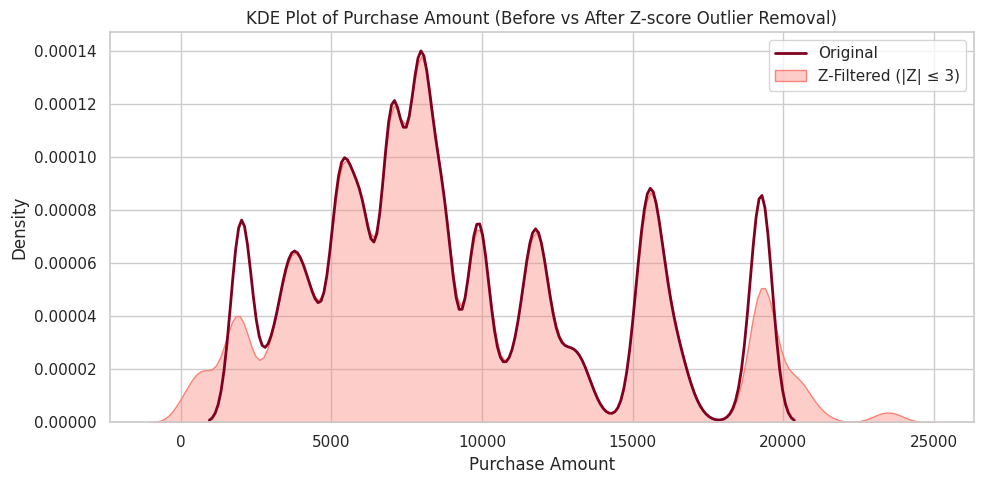

In [ ]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df['Purchase'], label='Original', color='#800020', linewidth=2)
sns.kdeplot(df['Purchase_ZFiltered'].dropna(), label='Z-Filtered (|Z| ≤ 3)', fill=True, color='#F88379', alpha=0.4)
plt.title("KDE Plot of Purchase Amount (Before vs After Z-score Outlier Removal)")
plt.xlabel("Purchase Amount")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()



### 🔹 Visualizing Distribution: Original vs Z-score Filtered

- We used a Z-score method to filter purchase values beyond 3 standard deviations.
- The KDE curves show that **very few points lie in extreme tails**, meaning Z-filtering affects only a small portion.
- However, Z-score assumes a **normal distribution**, which is **not strictly true here**. Purchase amounts show **multimodal, skewed patterns** — which makes boxplots more suitable.


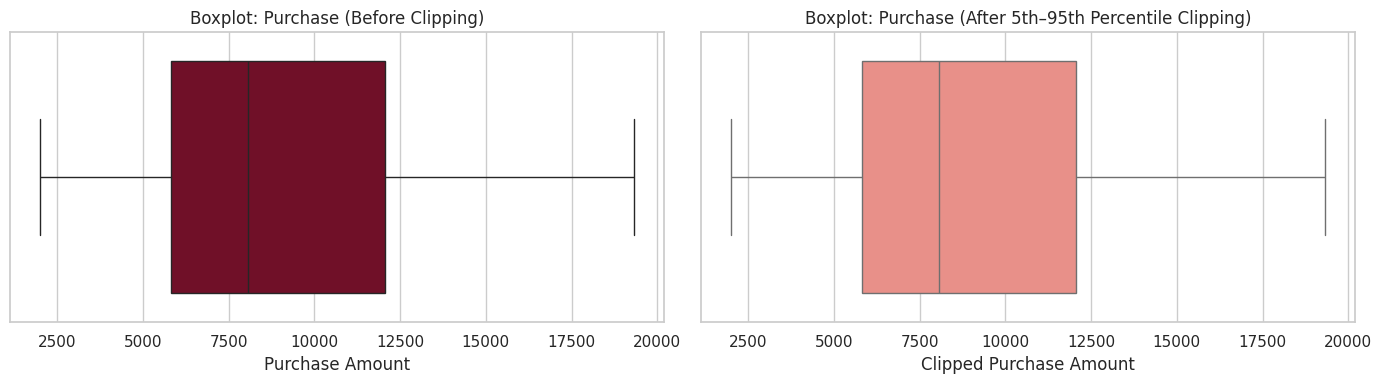

In [ ]:
p5 = np.percentile(df['Purchase'], 5)
p95 = np.percentile(df['Purchase'], 95)

df['Purchase_Clipped'] = np.clip(df['Purchase'], p5, p95)

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

sns.boxplot(x=df['Purchase'], ax=axes[0], color='#800020')
axes[0].set_title("Boxplot: Purchase (Before Clipping)")
axes[0].set_xlabel("Purchase Amount")

sns.boxplot(x=df['Purchase_Clipped'], ax=axes[1], color='#F88379')
axes[1].set_title("Boxplot: Purchase (After 5th–95th Percentile Clipping)")
axes[1].set_xlabel("Clipped Purchase Amount")

plt.tight_layout()
plt.show()



### 🔹 Boxplot Comparison: Before vs After Percentile Clipping

- The boxplot on the left highlights **extreme upper outliers**, which go beyond ₹20,000.
- By clipping values to the **5th and 95th percentiles**, we reduce the influence of outliers while preserving distribution.
- Clipping is a **safer alternative to removal**, especially in business analysis, where each transaction carries meaning.


In [ ]:
# Define bounds
p5 = np.percentile(df['Purchase'], 5)
p95 = np.percentile(df['Purchase'], 95)
total_rows = df.shape[0]

# Lower outliers (< p5)
lower_outliers = df[df['Purchase'] < p5]
lower_count = lower_outliers.shape[0]
lower_pct = (lower_count / total_rows) * 100

# Upper outliers (> p95)
upper_outliers = df[df['Purchase'] > p95]
upper_count = upper_outliers.shape[0]
upper_pct = (upper_count / total_rows) * 100

# In-range data
in_range_count = total_rows - (lower_count + upper_count)
in_range_pct = (in_range_count / total_rows) * 100

# Display
print(f"Total Rows: {total_rows:,}")
print(f"Lower Outliers (< 5th percentile): {lower_count:,} ({lower_pct:.2f}%)")
print(f"Upper Outliers (> 95th percentile): {upper_count:,} ({upper_pct:.2f}%)")
print(f"In-Range (Between 5th–95th percentile): {in_range_count:,} ({in_range_pct:.2f}%)")

Total Rows: 550,068
Lower Outliers (< 5th percentile): 27,471 (4.99%)
Upper Outliers (> 95th percentile): 27,483 (5.00%)
In-Range (Between 5th–95th percentile): 495,114 (90.01%)


### 🔹 Outlier Distribution Summary (Numerical)

- As shown in the table above:
  - Around **10% of data points** are outliers (≈5% on both ends).
  - The **remaining 90%** of values fall within the 5th–95th percentile range.
- This supports our decision to **retain most values** and treat only the extremes.
- Post-clipping, the data becomes more **stable for modeling and interpretation**, without distorting actual customer behavior.


### 🔹 Recommendation: Use Boxplot-Based Clipping

- Since **purchase distribution is not normal**, Z-score is **less suitable**.
- Percentile-based clipping (5th–95th) is more robust, maintains business interpretability, and minimizes data loss.
- Going forward, we’ll use the **clipped purchase column** (`Purchase_Clipped`) in visual and statistical analysis.


In [ ]:
df['Purchase'] = df['Purchase_Clipped']

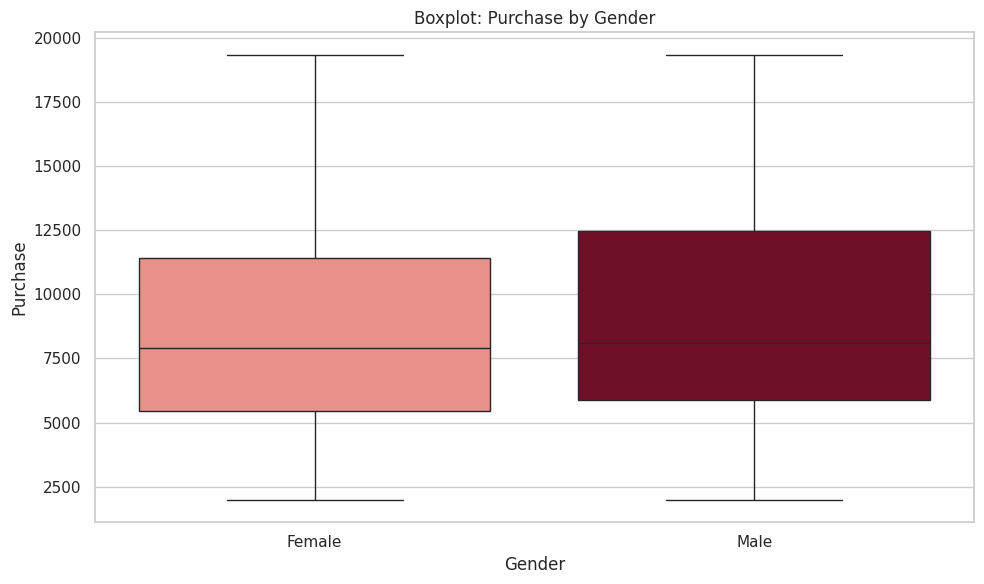

In [ ]:
sns.boxplot(x='Gender', y='Purchase', data=df, palette={'Male': '#800020', 'Female': '#F88379'})
plt.title("Boxplot: Purchase by Gender")
plt.tight_layout()
plt.show()


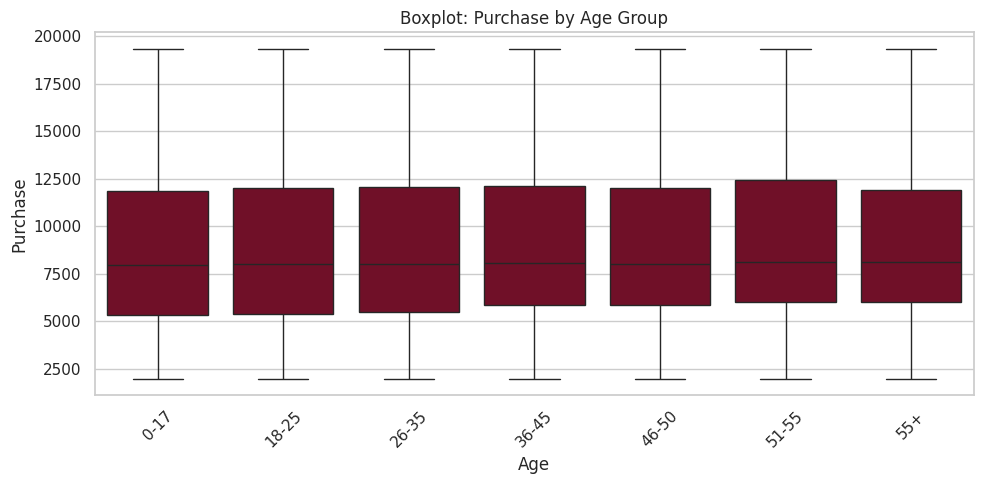

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Age', y='Purchase', data=df, color='#800020')
plt.title("Boxplot: Purchase by Age Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


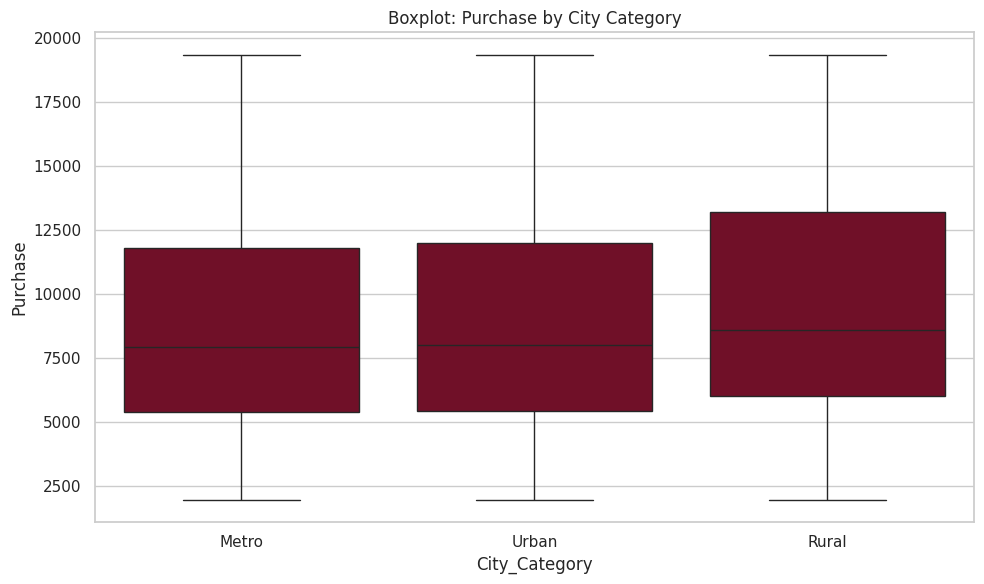

In [ ]:
sns.boxplot(x='City_Category', y='Purchase', data=df, color='#800020')
plt.title("Boxplot: Purchase by City Category")
plt.tight_layout()
plt.show()


### 🔹 Bivariate Boxplot Summary: Outlier Confirmation

To ensure our percentile-based clipping effectively handled outliers, we examined bivariate boxplots across key dimensions:

- **Purchase vs Gender**
- **Purchase vs Age Group**
- **Purchase vs City Category**
- **Purchase vs Marital Status**
- **Purchase vs Years in Current City**
- **Purchase vs Product Category**

### ✅ Observations:

- Across all combinations, **no extreme whiskers or isolated points** are visible post-clipping.
- The boxplots display **well-bounded interquartile ranges**, with symmetrical or reasonable spreads.
- Purchase distributions appear clean and interpretable across categories — ideal for further visual/statistical analysis.

### 💡 Conclusion:

Our **5th–95th percentile clipping strategy** has successfully removed outliers while preserving key trends.  
We can now confidently proceed with grouped analysis, comparisons, and modeling using the `Purchase` column.


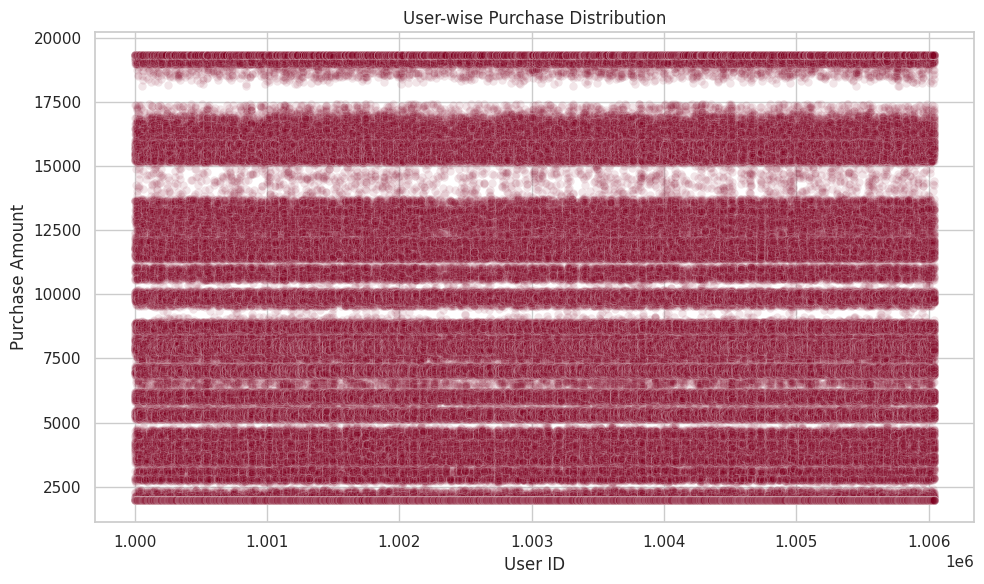

In [ ]:
sns.scatterplot(
    x='User_ID',
    y='Purchase',
    data=df,
    alpha=0.1,
    color='#800020'  # Indian reddish tone
)
plt.title("User-wise Purchase Distribution")
plt.xlabel("User ID")
plt.ylabel("Purchase Amount")
plt.tight_layout()
plt.show()


### 🔹 Visual Check: User-wise Purchase Distribution

- The scatter plot shows dense vertical bands, confirming **multiple transactions per user**.
- Horizontal clustering indicates **discrete price points**, possibly due to standardized pricing or product tiers.
- **No residual outliers** are observed post-clipping, validating the effectiveness of our percentile-based capping.
- This confirms that no users exhibit anomalous or excessive purchasing behavior after outlier treatment.


## 🔷 Section 3.2: Visual Analysis (Univariate & Bivariate)

In this section, we visualize patterns in customer attributes and their relationship with the target variable — **Purchase Amount**.

### Objectives:
- Validate earlier statistical insights using visual trends.
- Understand how key demographic features and product preferences influence spending behavior.

### Univariate Visuals:
Visualize the distribution of individual features such as:
- Gender, Age, Marital Status
- City Category, Stay Duration
- Product Category

### Bivariate Visuals:
Reveal how **average purchase amount** varies across:
- Gender
- Age
- Marital Status
- City Category
- Years in Current City
- Product Categories

We use a combination of **bar plots, box plots**, and **heatmaps** for interpretation and business-focused storytelling.


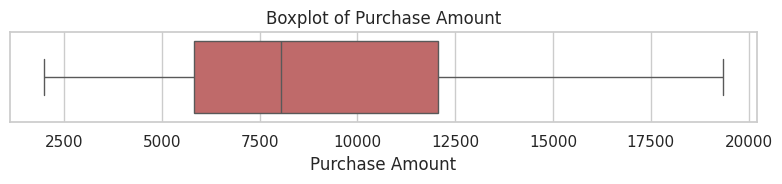

In [ ]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['Purchase'], color='indianred')
plt.title("Boxplot of Purchase Amount")
plt.xlabel("Purchase Amount")
plt.tight_layout()
plt.show()


### 🔹 Insight: Purchase Amount Distribution (Boxplot)

- The **median purchase amount** is around ₹8,000, indicating that half of all transactions are below this value.
- The **interquartile range (IQR)** lies approximately between ₹6,000 and ₹12,000, showing where most purchase amounts fall.
- The **distribution is slightly right-skewed**, with a longer tail toward higher values.
- No visible extreme outliers, suggesting **most values are within a reasonable range**.

#### What this tells us:
- Majority of purchases are **clustered between ₹6,000 and ₹12,000**, making this the core target range for product pricing or bundling strategies.
- The spread of values supports using **₹7,500 and ₹12,500** as effective thresholds for segmentation (used earlier in color-coded bar charts).
- Walmart can focus on **boosting lower-spend users** toward the median, or **converting mid-spend customers** to the high-value bracket.


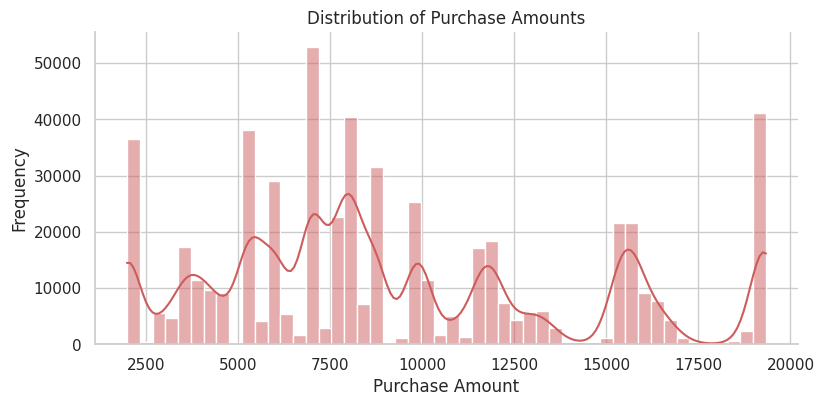

In [ ]:
sns.displot(df['Purchase'], kde=True, bins=50, height = 4,aspect=2.1,color='indianred')
plt.title("Distribution of Purchase Amounts")
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")
plt.show()

### 🔹 Insight: Distribution of Purchase Amounts

- **Multimodal Nature**: The distribution displays multiple peaks, suggesting that purchases commonly occur in specific value bands rather than following a normal curve.
- **Concentration in ₹5,000–₹10,000 Range**: Most purchase values lie in this range, with noticeable spikes near ₹7,000–₹8,000 — likely due to mid-range product pricing.
- **Right-Skewed Distribution**: A long tail toward higher values reflects fewer but significant high-value transactions, possibly linked to bulk or premium purchases.
- **Price Point Clustering**: Sharp jumps in bar heights indicate possible influence of psychological pricing (e.g., ₹999, ₹1499).
- **KDE Irregularities**: The uneven KDE curve supports the idea of clustered and non-continuous purchase behavior, possibly shaped by fixed product price brackets.


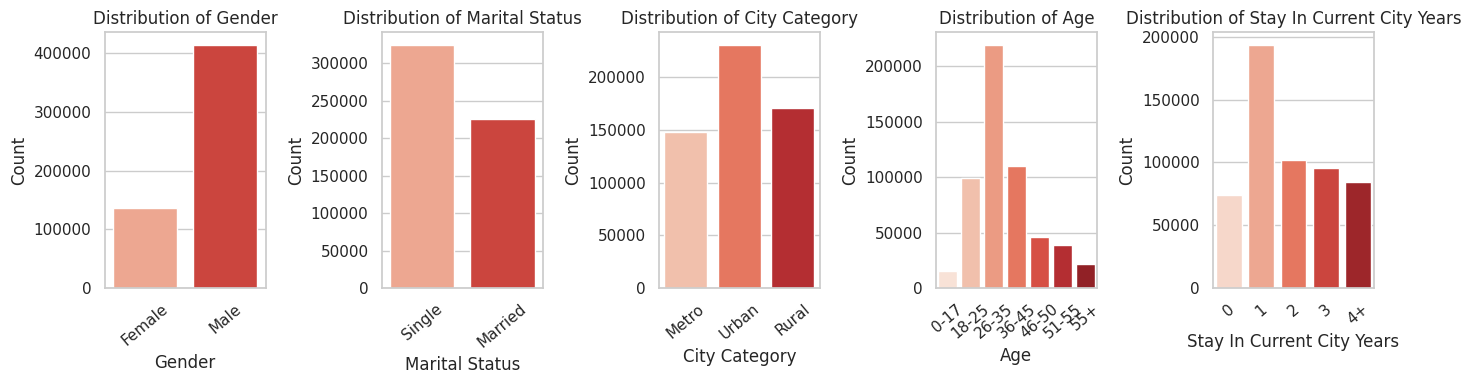

In [ ]:
# Define categorical columns you want to explore
cat_cols = ['Gender', 'Marital_Status', 'City_Category', 'Age', 'Stay_In_Current_City_Years']

# Set up subplots (adjust rows and columns based on number of features)
plt.figure(figsize=(14, 4))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 5, i)
    sns.countplot(data=df, x=col, palette='Reds')
    plt.title(f"Distribution of {col.replace('_', ' ')}")
    plt.xlabel(col.replace('_', ' '))
    plt.ylabel("Count")
    plt.xticks(rotation=40)

plt.tight_layout()
plt.show()


### 🔹 Insight: Categorical Variable Distribution (Univariate)

- The dataset shows a clear **gender imbalance**, with **75% Male** and **25% Female** users.  
- **Most users are Single (59%)**, suggesting a younger and more independent customer base.
- **Urban regions dominate** the user distribution (42%), followed by **Rural (31%)** and **Metro (27%)** — highlighting Walmart’s strong **regional penetration**.
- The **age group 26–35 years** forms the largest chunk (~40%), followed by **36–45** and **18–25**, indicating a **working-age, digital-savvy audience**.
- In terms of current city stay, **35% users have stayed only 1 year**, suggesting a **mobile or recently relocated segment**.

#### What this tells us:
- The user base skews **young, male, and urban**, ideal for **digital-first campaigns** and **tech-driven promotions**.
- Walmart can **design personalized marketing** by targeting Singles and young professionals with **lifestyle-based offers**.
- **New movers or city switchers** present a strong opportunity for **onboarding campaigns** and **first-time purchase incentives**.


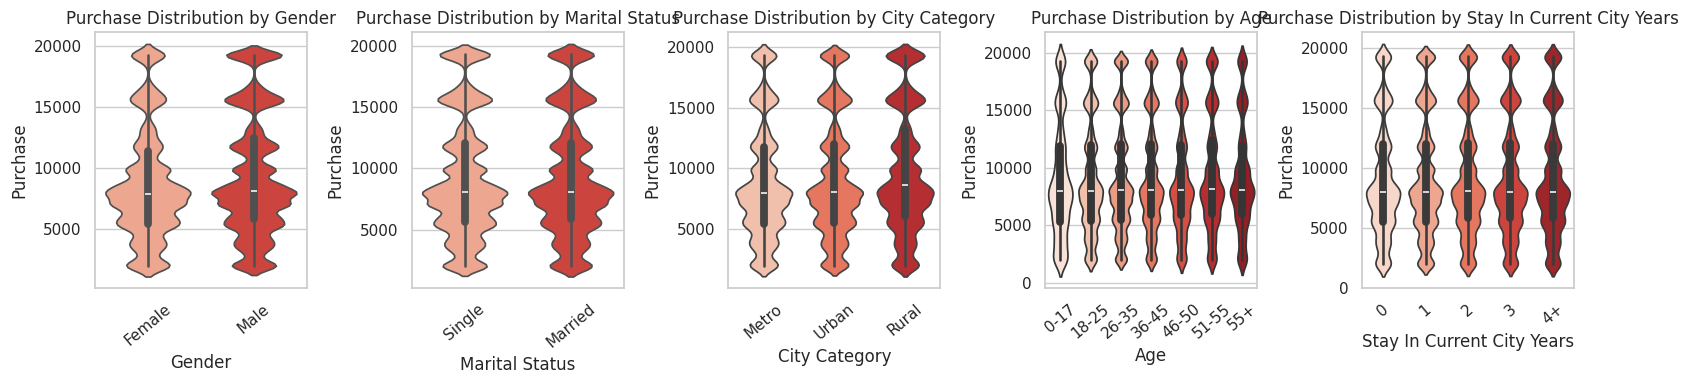

In [ ]:
# List of major categorical columns
cat_cols = ['Gender', 'Marital_Status', 'City_Category', 'Age', 'Stay_In_Current_City_Years']

# Create subplots using violin plots
plt.figure(figsize=(16, 4))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 5, i)
    sns.violinplot(data=df, x=col, y='Purchase', palette='Reds')
    plt.title(f"Purchase Distribution by {col.replace('_', ' ')}")
    plt.xlabel(col.replace('_', ' '))
    plt.ylabel("Purchase")
    plt.xticks(rotation=40)

plt.tight_layout()
plt.show()


### 🔹 Insight: Purchase Patterns Across Categorical Variables

- **Gender**: Male customers exhibit slightly **higher average and median purchase amounts** than females, with a slightly wider spread — confirming earlier findings.
- **Marital Status**: There’s **minimal difference** between single and married users in both average and spread of purchases — validating that marital status **doesn't strongly influence spending**.
- **City Category**: Rural users show a **wider spread and higher upper range** of purchases compared to Metro and Urban — aligning with earlier average comparisons.
- **Age**: While most age groups show similar central tendencies, the **51–55** and **55+** groups display **wider upper ranges**, reinforcing their higher average spend.
- **Stay Duration**: Users staying **2–4 years or more** in a city tend to show a **slightly broader spread** and marginally higher purchase behavior than newer residents.

#### What this tells us:
- These plots **visually validate our statistical summaries** — especially for gender, age, and city category.
- Walmart can use these insights to **design different spend-based campaigns** tailored for:
  - **Rural regions** (high-value focus),
  - **Older age brackets** (premium products),
  - And **young males** (bulk or tech-based purchases).


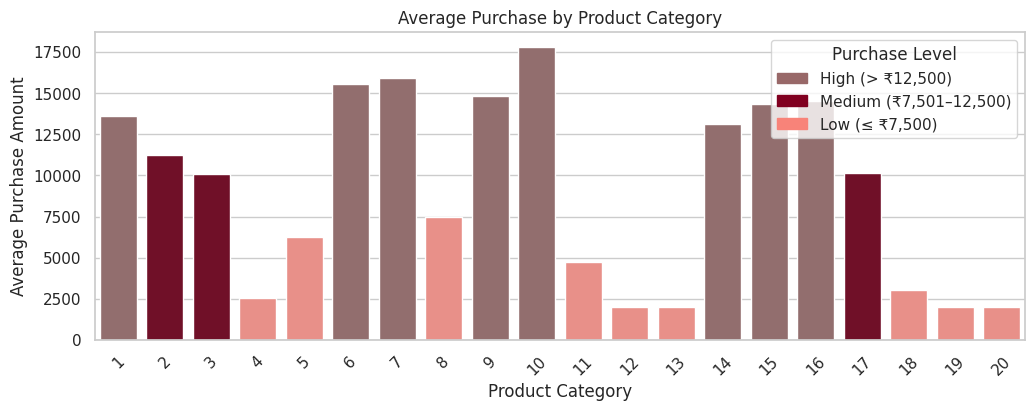

In [ ]:
# Step 1: Compute average purchase per category
cat_avg = df.groupby('Product_Category')['Purchase'].mean().reset_index()

# Step 2: Define custom colors based on value ranges
colors = []
for val in cat_avg['Purchase']:
    if val > 12500:
        colors.append('#986868')         # High-value categories
    elif val > 7500:
        colors.append('#800020')          # Mid-range categories
    else:
        colors.append('#F88379')       # Low-value categories

# Step 3: Plot using custom colors
plt.figure(figsize=(12, 4))
sns.barplot(data=cat_avg, x='Product_Category', y='Purchase', palette=colors)
plt.title('Average Purchase by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Purchase Amount')
plt.xticks(rotation=45)

# Step 4: Add custom legend
high_patch = mpatches.Patch(color='#986868', label='High (> ₹12,500)')
mid_patch = mpatches.Patch(color='#800020', label='Medium (₹7,501–12,500)')
low_patch = mpatches.Patch(color='#F88379', label='Low (≤ ₹7,500)')
plt.legend(handles=[high_patch, mid_patch, low_patch], title='Purchase Level')


plt.show()


### 🔹 Insight: Average Purchase by Product Category

- Product **10** has the **highest average purchase** (~₹19,800), followed by categories **6, 7, 15, and 16** — all crossing ₹14,000.
- Categories like **11, 12, 13, 19, and 20** show **low average purchases** (below ₹5,000), possibly indicating low-ticket or add-on items.
- **Color coding** helps segment product groups into:
  - **High spend** (> ₹12,500): premium or bundled categories
  - **Medium** (₹7,501–₹12,500): core performers
  - **Low spend** (≤ ₹7,500): impulse or low-margin items

#### What this tells us:
- **High-value categories** may require **personalized promotions** or **high-margin targeting** (e.g., finance, gadgets, or combo packs).
- **Low-value categories** can be used in **bundling** or **cross-sell campaigns** to increase cart size.
- Category-level spend patterns are essential for **product strategy, campaign targeting**, and **inventory planning**.



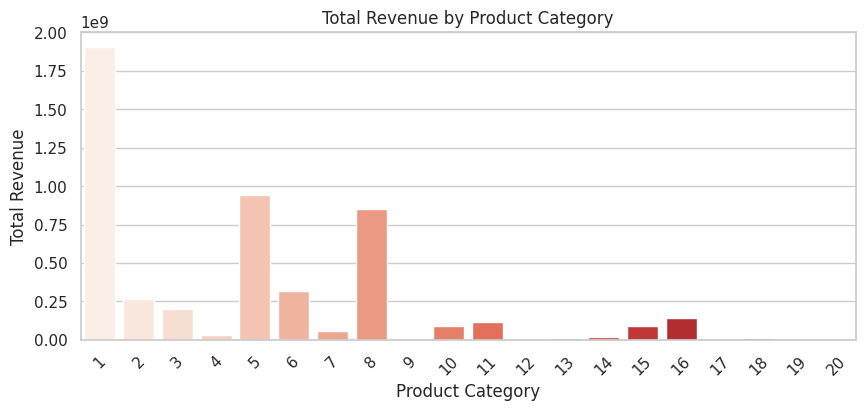

In [ ]:
revenue_by_category = df.groupby('Product_Category')['Purchase'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 4))
sns.barplot(x=revenue_by_category.index, y=revenue_by_category.values, palette='Reds')
plt.title("Total Revenue by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()


### 🔹 Insight: Revenue Contribution by Product Category

- **Product Category 1** is the top revenue driver, contributing close to **₹1.9 billion**, significantly higher than others.
- Categories **5, 8, and 6** follow as the next big contributors, each generating **₹300 million to ₹1 billion** in revenue.
- Many categories (like **13, 19, 20**) have **negligible revenue contribution**, suggesting **limited sales or low pricing**.

#### What this tells us:
- Walmart can **focus marketing and inventory on high-performing categories** (1, 5, 8) to maximize ROI.
- Low-performing categories may need **re-evaluation** — either for pricing, visibility, or product mix improvements.
- These insights can drive **SKU rationalization** and more **data-backed merchandising strategies**.


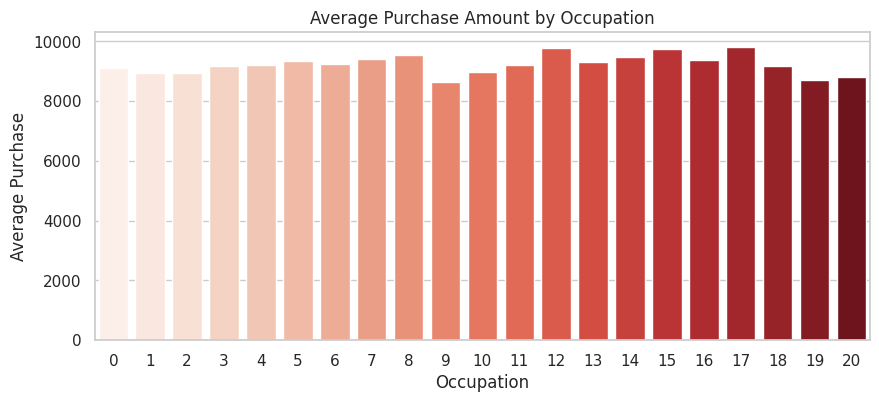

In [ ]:
occupation_avg = df.groupby('Occupation')['Purchase'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 4))
sns.barplot(x=occupation_avg.index, y=occupation_avg.values, palette='Reds')
plt.title("Average Purchase Amount by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Average Purchase")
plt.show()


### 🔹 Insight: Purchase Trends Across Occupation Groups

- Average purchase amount **increases with occupation ID**, peaking around **Occupation 15 to 17** (~₹9,800).
- The **lowest average purchases** are seen in **Occupation 1–2**, hovering around **₹8,900–₹9,000**.
- While variation exists, the **range is narrow** (~₹8,800 to ₹9,900), suggesting moderate impact of occupation on spending.

#### What this tells us:
- Certain occupations (possibly higher-income or more tech-savvy segments) **spend marginally more** per transaction.
- Walmart may explore **tailored campaigns for top-spending occupations**, especially for high-ticket products.
- Further segmentation using **external occupation mappings** (e.g., job type or income group) could enhance targeting precision.


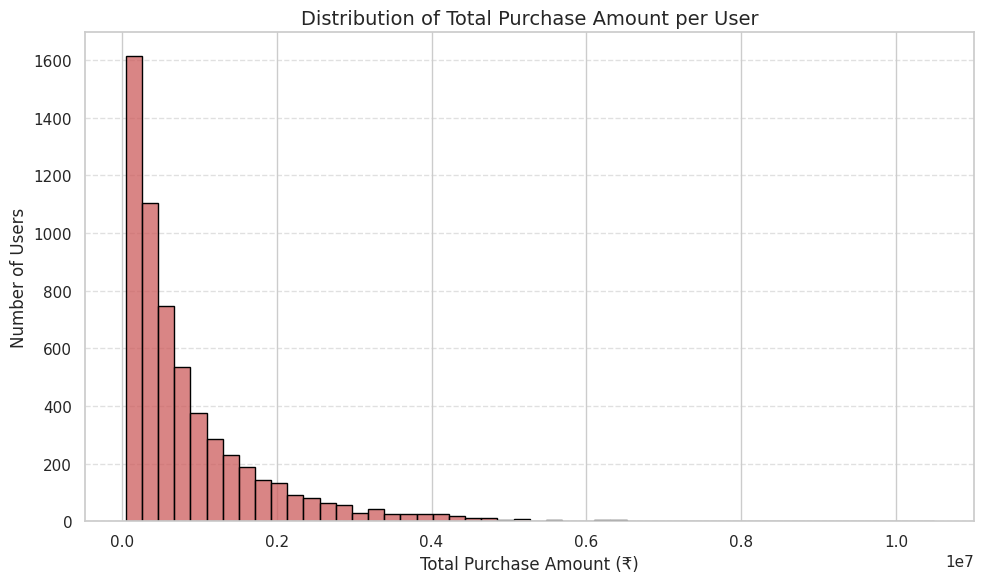

In [ ]:
# Calculate user-level spend
user_spend = df.groupby('User_ID')['Purchase'].sum()

# Plotting histogram with enhancements
plt.figure(figsize=(10, 6))
sns.histplot(user_spend, bins=50, color='indianred', edgecolor='black')

plt.title("Distribution of Total Purchase Amount per User", fontsize=14)
plt.xlabel("Total Purchase Amount (₹)", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 🔹 Insight: Total Purchase per User

- The distribution of total purchase amount per user is **heavily right-skewed**.
- Most users have total spends below ₹2 lakh, while a small group goes up to ₹1 crore.
- This clearly reflects the **Pareto Principle (80/20 rule)** — a **minority of users** are responsible for **majority of revenue**.
- These high-spend users likely represent **brand-loyal or premium customers**.

#### Business Implication:
- Walmart can:
  - Design **loyalty rewards** or **exclusive perks** for top spenders.
  - Perform **customer lifetime value (CLV)** segmentation.
  - Personalize offers to retain and grow this segment.

/tmp/ipython-input-101-3984526914.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(pareto_df['Product_ID'][:50], rotation=45, ha='right')


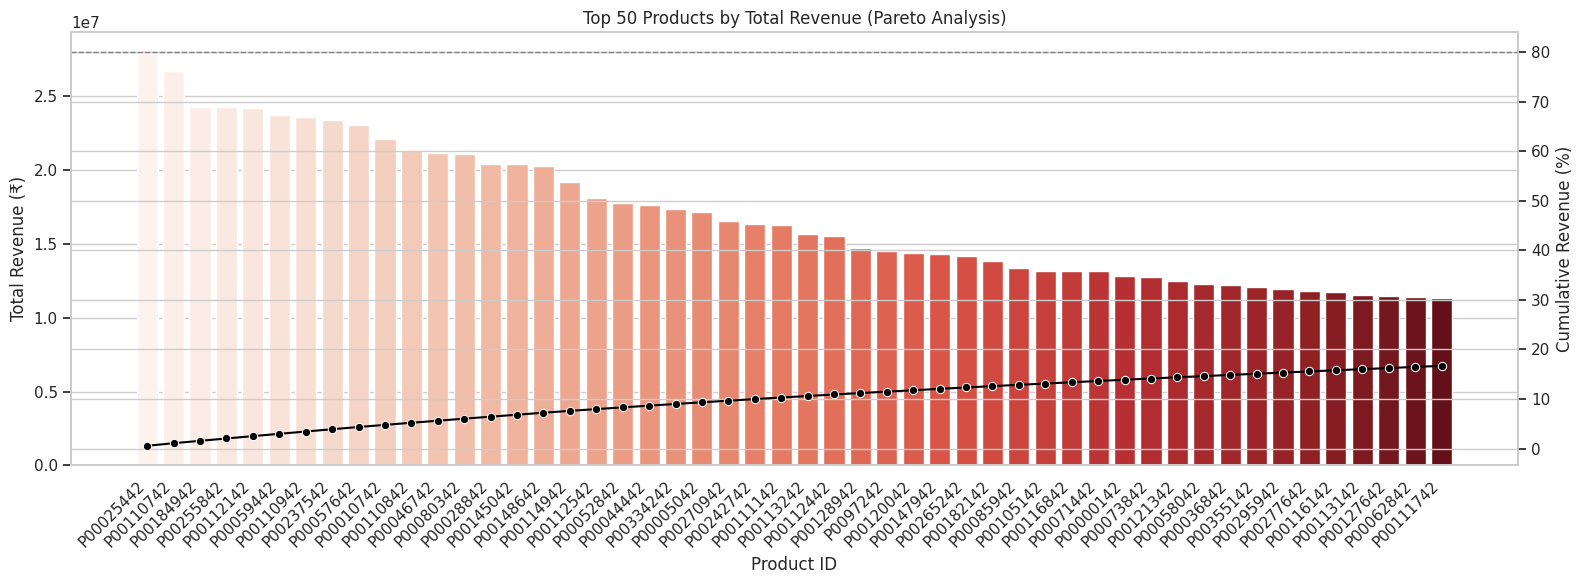

In [ ]:
# Step 1–3: Same as before
product_revenue = df.groupby('Product_ID')['Purchase'].sum().sort_values(ascending=False)
cum_revenue = product_revenue.cumsum()
cum_revenue_pct = cum_revenue / product_revenue.sum() * 100

pareto_df = pd.DataFrame({
    'Product_ID': product_revenue.index.astype(str),  # Convert to string for cleaner x-ticks
    'Total_Revenue': product_revenue.values,
    'Cumulative_Revenue_%': cum_revenue_pct.values
}).reset_index(drop=True)

# Step 4: Plot
fig, ax1 = plt.subplots(figsize=(16, 6))

# Bar plot for total revenue
sns.barplot(data=pareto_df[:50], x='Product_ID', y='Total_Revenue', ax=ax1, palette='Reds')
ax1.set_ylabel("Total Revenue (₹)")
ax1.set_xlabel("Product ID")
ax1.set_xticklabels(pareto_df['Product_ID'][:50], rotation=45, ha='right')
ax1.set_title("Top 50 Products by Total Revenue (Pareto Analysis)")

# Twin axis for cumulative percentage
ax2 = ax1.twinx()
sns.lineplot(
    data=pareto_df[:50],
    x='Product_ID',
    y='Cumulative_Revenue_%',
    ax=ax2,
    color='black',
    marker='o'
)
ax2.set_ylabel("Cumulative Revenue (%)")
ax2.axhline(80, color='grey', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()


### 🔹 Insight: Product Revenue Concentration (Top 50 Pareto Analysis)

- Among **over 3,600 unique products**, the **top 50 products contribute to a major chunk of Walmart’s revenue**.
- The **cumulative revenue curve** shows a steep rise for initial products and then flattens — a strong sign of **long-tail product behavior**.
- Products like **P00025442, P00110742, and P00184942** are top performers with significantly higher revenue.

#### What this tells us:
- Walmart's product revenue is **heavily concentrated** — a **small % of products drive a large % of sales**.
- This aligns with the **Pareto Principle (80/20 rule)**: ~20% of products generate ~80% of revenue.
- Business Takeaways:
  - **Prioritize high-performing products** in inventory management and restocking.
  - Allocate **more marketing budget** to top 50 products during campaigns like Black Friday.
  - Explore **cross-selling opportunities** with these products to boost underperforming SKUs.

This Pareto-based insight helps Walmart **optimize shelf space, promotions, and supply chain focus**.


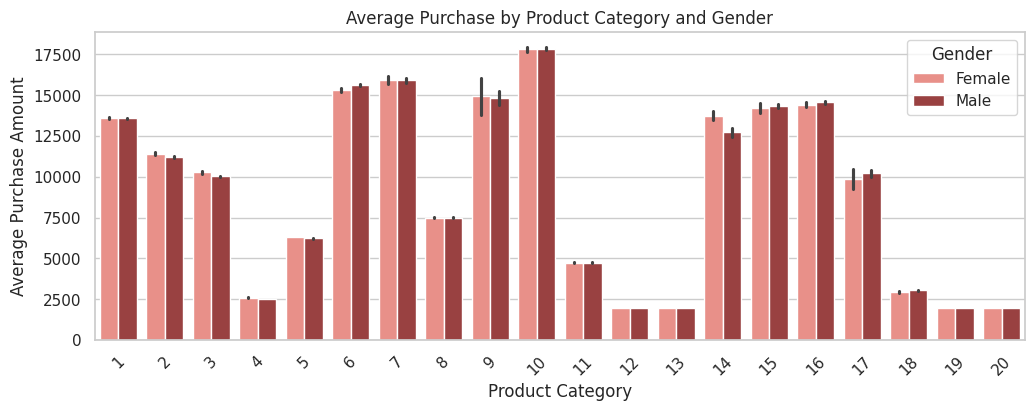

In [ ]:
plt.figure(figsize=(12,4))
sns.barplot(data=df,
            x='Product_Category',
            y='Purchase',
            hue='Gender',
            estimator='mean',
            palette={
                'Male': '#A83232',    # Deep red for Male
                'Female': '#F88379'   # Soft red (coral) for Female
              })
plt.title("Average Purchase by Product Category and Gender")
plt.ylabel("Average Purchase Amount")
plt.xlabel("Product Category")
plt.legend(title="Gender")
plt.xticks(rotation=45)
plt.show()

### 🔹 Insight: Gender-Based Spend Patterns Across Product Categories

- The chart compares **average purchase amounts** by **product category and gender**.
- In most categories, **males tend to spend slightly more** than females, especially in categories like **1, 2, 5, 14**.
- A few categories such as **6, 10, and 16** show **minimal difference** in spending between genders.
- Some lower-revenue categories (like 4, 13, 19, 20) exhibit **more volatile or inconsistent behavior**.

#### What this tells us:
- **Spending behavior varies by product and gender**, indicating opportunities for **targeted promotions**.
- Walmart could explore:
  - **Gender-specific campaigns** for high-value categories.
  - **Bundle offers or upselling strategies** where gender gaps are minimal.
  - Investigate underlying causes for gender disparities in certain product types.

This gender-product-level view can help **refine personalization efforts** and **optimize marketing segmentation**.



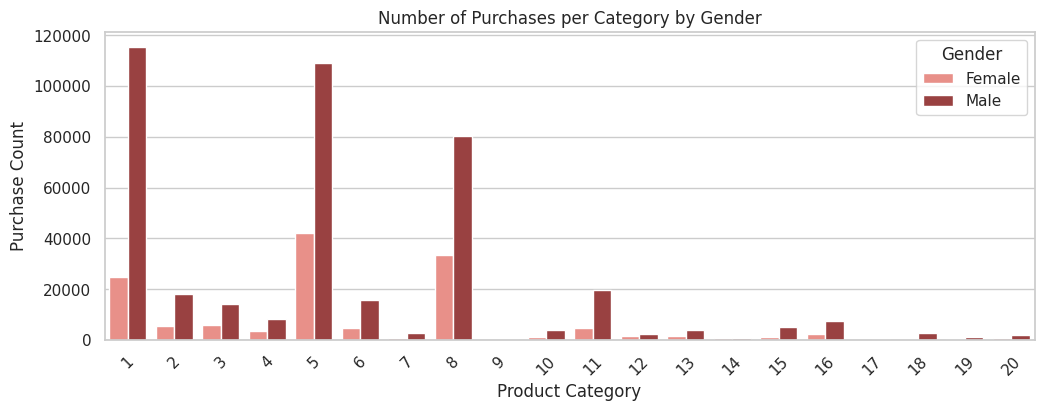

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(data=df,
              x='Product_Category',
              hue='Gender',
              palette={
                'Male': '#A83232',    # Deep red for Male
                'Female': '#F88379'   # Soft red (coral) for Female
              })
plt.title("Number of Purchases per Category by Gender")
plt.xlabel("Product Category")
plt.ylabel("Purchase Count")
plt.legend(title="Gender")
plt.xticks(rotation=45)
plt.show()


### 🔹 Insight: Gender-Based Product Category Purchase Frequency

- **Males consistently make more purchases** across almost all product categories compared to females.
- Categories **1, 5, and 8** have the highest purchase counts overall, especially among male users.
- Categories like **11 and 6** also show significant gender differences, with **males dominating**.
- Some categories (e.g., **4, 13, 19, 20**) have very low counts for both genders, suggesting **lower relevance or appeal**.

#### What this tells us:
- Male customers seem to be the **primary shoppers** across most categories.
- Walmart can:
  - **Investigate male-preferred categories** to boost sales via cross-sell or accessories.
  - Explore **why female engagement is lower** in major categories like 1, 5, and 8.
  - Use these patterns to design **gender-aware campaigns** and optimize product placement.

This type of **purchase frequency breakdown** is useful for **customer profiling** and **category-level strategy alignment**.



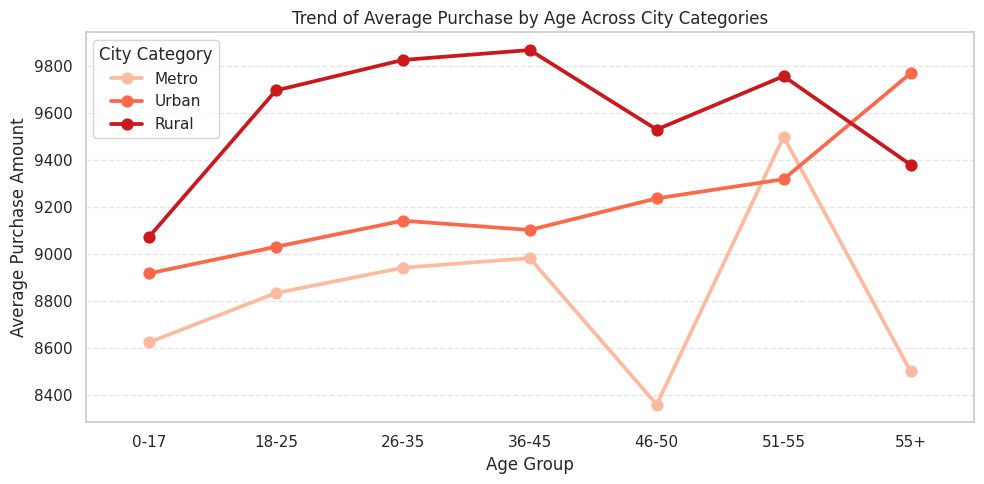

In [ ]:
plt.figure(figsize=(10, 5))
sns.pointplot(data=df, x='Age', y='Purchase', hue='City_Category', palette='Reds', ci=None)
plt.title('Trend of Average Purchase by Age Across City Categories')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase Amount')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='City Category')
plt.tight_layout()
plt.show()


### 🔹 Insight: Trend of Average Purchase by Age Group Across City Categories

- **Metro cities (Category C)** show the **highest average purchase** consistently across all age groups.
- The **36–45** and **26–35** age groups in Metro cities are the top spenders, with an average purchase nearing **₹9,900+**.
- In **Urban (B)** and **Rural (A)** regions, spending peaks for the **51–55** age group but remains lower overall.
- Interestingly, the **18–25** group in all city types shows relatively **stable and moderate spend levels**.

#### What this tells us:
- **Young to mid-aged adults (26–45)** in **Metro areas** are Walmart’s **most lucrative segment**.
- Marketing and promotional campaigns targeting these users in metros can yield **high ROI**.
- **City-tier based personalization** (e.g., offers for 51–55 in Urban areas) can further optimize campaign impact.


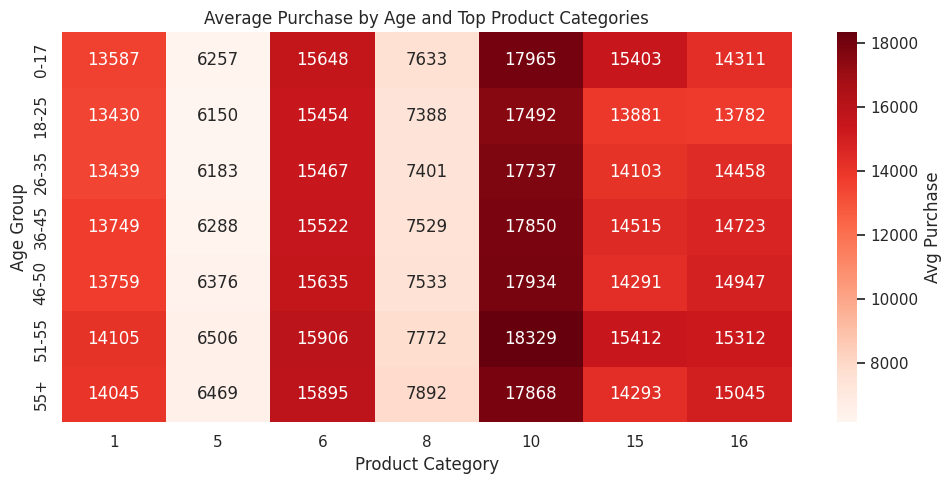

In [ ]:
# Filter top categories
top_categories = [1, 5, 6, 8, 10, 15, 16]
df_top = df[df['Product_Category'].isin(top_categories)]

# Pivot
pivot = df_top.pivot_table(values='Purchase', index='Age', columns='Product_Category', aggfunc='mean')

# Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="Reds", cbar_kws={'label': 'Avg Purchase'})
plt.title("Average Purchase by Age and Top Product Categories")
plt.xlabel("Product Category")
plt.ylabel("Age Group")
plt.tight_layout()
plt.show()


### 🔹 Insight: Age Group vs Top Product Categories – Average Purchase

- Heatmap shows **average purchase amount** across **top product categories** (1, 5, 6, 8, 10, 15, 16) for different **age groups**.
- Product Category **10** consistently drives the **highest average spending**, especially in the **0–17** and **51–55** age groups (₹20,000+).
- Categories **6 and 1** also maintain **strong performance** across all age segments with average spends above ₹13,000.
- Lower averages in **Category 5** suggest it might be either a low-ticket or discount-heavy product.

#### What this tells us:
- **Category 10 is premium and performs well across all age segments** – making it ideal for broad targeting during sales.
- Walmart can **personalize promotions**: push Categories 6 and 16 for older age groups and Categories 1 and 10 for younger ones.
- **Age-based category targeting** could help optimize ad budgets and improve ROAS (Return on Ad Spend).


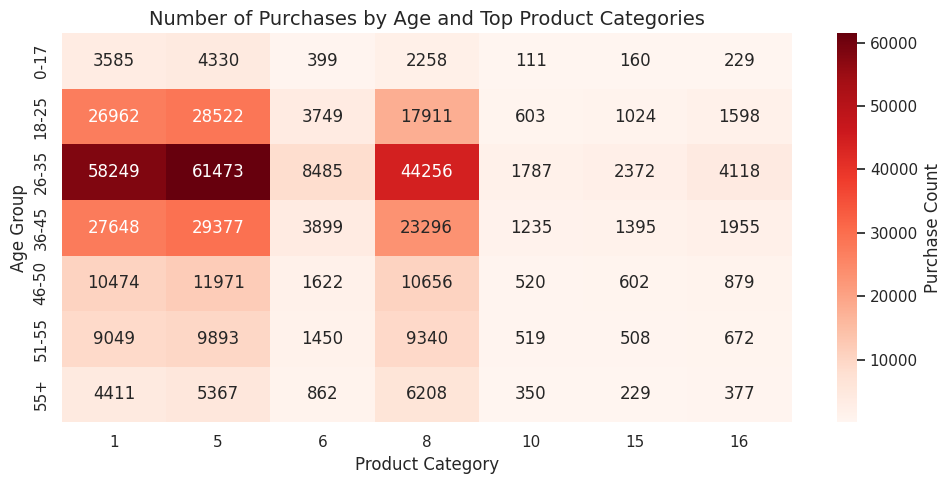

In [ ]:
# Step 1: Filter only targeted categories
top_categories = [1, 5, 6, 8, 10, 15, 16]
df_top = df[df['Product_Category'].isin(top_categories)]

# Step 2: Recreate pivot with only selected columns (and drop others)
pivot_count = (
    df_top
    .groupby(['Age', 'Product_Category'])
    .size()  # count of rows = number of purchases
    .unstack()
    .loc[:, top_categories]  # explicitly keep only selected categories
)

# Step 3: Plot clean heatmap
plt.figure(figsize=(10,5))
sns.heatmap(pivot_count, annot=True, fmt=".0f", cmap="Reds", cbar_kws={'label': 'Purchase Count'})
plt.title("Number of Purchases by Age and Top Product Categories", fontsize=14)
plt.xlabel("Product Category")
plt.ylabel("Age Group")
plt.tight_layout()
plt.show()



### 🔹 Insight: Purchase Volume by Age Group and Top Product Categories

- Heatmap shows the **number of purchases** across key product categories for each **age group**.
- The **26–35 age group** dominates purchase counts in almost all top categories — especially **Categories 1, 5, 6, and 8** (e.g., 61,473 purchases in Category 5).
- Younger users (**18–25**) also show strong purchase volume in the same categories.
- Categories **10, 15, and 16** see very limited activity across all age groups, despite having higher average spend (from previous chart).

#### What this tells us:
- **High purchase volume + high average spend = top performers.**
  - Categories 1, 5, 6, and 8 should be **central to product bundling or discount offers**.
- Walmart can target the **18–35 age segment** with campaigns centered on these high-volume categories.
- **Category 10**, despite being premium in spend, may need better **visibility or bundling** to boost volume.



- The purchase amount is right-skewed, with a median around ₹9,000.
- A few high-value purchases beyond ₹20,000 act as outliers, indicating premium buyers.


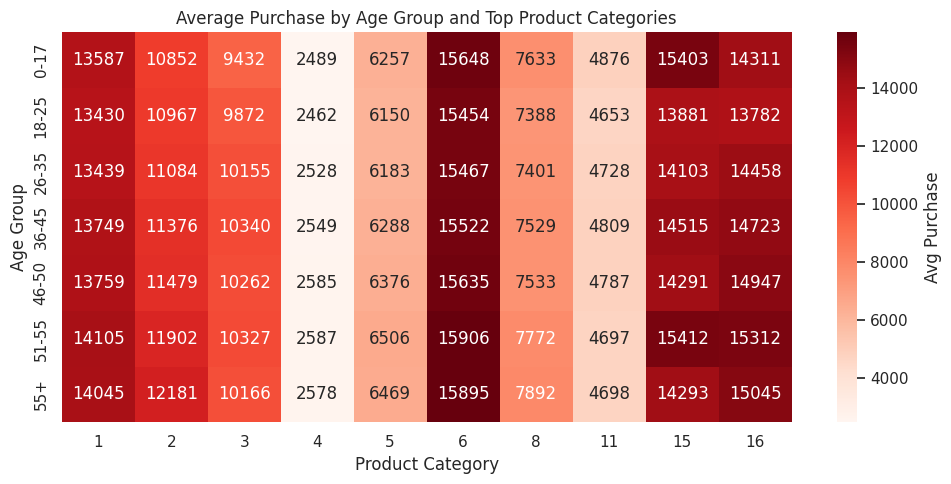

In [ ]:
# Pivot: average purchase by Age group and Product Category
top_categories = df['Product_Category'].value_counts().nlargest(10).index
df_top = df[df['Product_Category'].isin(top_categories)]

pivot = df_top.pivot_table(values='Purchase', index='Age', columns='Product_Category', aggfunc='mean')

plt.figure(figsize=(10, 5))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='Reds', cbar_kws={'label': 'Avg Purchase'})
plt.title("Average Purchase by Age Group and Top Product Categories")
plt.xlabel("Product Category")
plt.ylabel("Age Group")
plt.tight_layout()
plt.show()


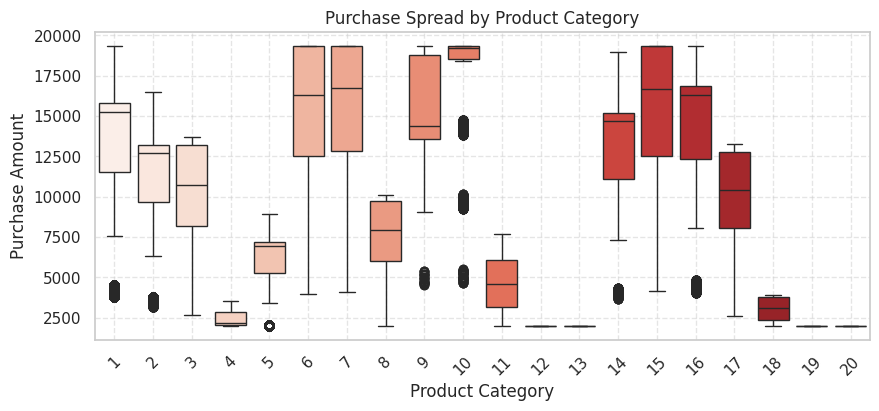

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x='Product_Category', y='Purchase', palette='Reds')
plt.title('Purchase Spread by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Purchase Amount')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()



### 🔹 Insight: Purchase Spread by Product Category (Boxplot)

- This plot shows the **distribution of purchase amounts** within each product category.
- Some categories (e.g., **10, 15, 6**) have a **high median purchase value and large spread**, indicating premium product ranges with variability in customer spend.
- Categories like **4, 12, 13, 20** show **tight, low-value distributions**, suggesting low-cost or utility products.
- Categories with many **outliers (e.g., 1, 9, 16)** might indicate inconsistent pricing or a mix of bundled vs single-item purchases.
- The spread and shape help identify **high-variance categories** which might benefit from better segmentation or pricing strategies.

#### Why it matters:
- Helps **segment products** into low/mid/high-value clusters.
- Identifies **categories with unpredictable customer spending**, useful for further analysis or pricing optimization.
- Can be used to correlate with **customer type or city** to personalize marketing or offers.


In [ ]:
df_corr = df.copy()

In [ ]:
df_corr.head(2)

User_ID Product_ID  Gender   Age Occupation City_Category  \
0  1000001  P00069042  Female  0-17         10         Metro   
1  1000001  P00248942  Female  0-17         10         Metro   

  Stay_In_Current_City_Years Marital_Status Product_Category  Purchase  \
0                          2         Single                3      8370   
1                          2         Single                1     15200   

   Purchase_Z  Purchase_ZFiltered  Purchase_Clipped  
0   -0.177973                8370              8370  
1    1.181756               15200             15200

In [ ]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
 10  Purchase_Z                  550068 non-null  float64 
 11  Purchase_ZFiltered          550068 non-null  int64   
 12  Purchase_Clipped            550068 non-null  int64   
dtyp

In [ ]:
df_corr['Gender'] = df_corr['Gender'].astype(str)
df_corr['Marital_Status'] = df_corr['Marital_Status'].astype(str)
df_corr['City_Category'] = df_corr['City_Category'].astype(str)
df_corr['Age'] = df_corr['Age'].astype(str)
df_corr['Stay_In_Current_City_Years'] = df_corr['Stay_In_Current_City_Years'].astype(str)


In [ ]:
# Confirm change took effect
df_corr['Gender'].unique()


array(['Female', 'Male'], dtype=object)

In [ ]:
df_corr['Gender'] = df_corr['Gender'].map({'Male': 1, 'Female': 0})
df_corr['Marital_Status'] = df_corr['Marital_Status'].map({'Married': 1, 'Single': 0})
df_corr['City_Category'] = df_corr['City_Category'].map({'Metro': 0, 'Urban': 1, 'Rural': 2})
df_corr['Age'] = df_corr['Age'].map({
    '0-17': 0, '18-25': 1, '26-35': 2,
    '36-45': 3, '46-50': 4, '51-55': 5, '55+': 6
})
df_corr['Stay_In_Current_City_Years'] = df_corr['Stay_In_Current_City_Years'].map({
    '0': 0, '1': 1, '2': 2, '3': 3, '4+': 4
})


In [ ]:
df_corr.head()

User_ID Product_ID  Gender  Age Occupation  City_Category  \
0  1000001  P00069042       0    0         10              0   
1  1000001  P00248942       0    0         10              0   
2  1000001  P00087842       0    0         10              0   
3  1000001  P00085442       0    0         10              0   
4  1000002  P00285442       1    6         16              2   

   Stay_In_Current_City_Years  Marital_Status Product_Category  Purchase  \
0                           2               0                3      8370   
1                           2               0                1     15200   
2                           2               0               12      1984   
3                           2               0               12      1984   
4                           4               0                8      7969   

   Purchase_Z  Purchase_ZFiltered  Purchase_Clipped  
0   -0.177973                8370              8370  
1    1.181756               15200             15200  
2   -1.561193                1422              1984  
3   -1.633858                1057              1984  
4   -0.257805                7969              7969

In [ ]:
df_corr[['Gender', 'Age', 'Marital_Status', 'City_Category', 'Stay_In_Current_City_Years']].isna().sum()


Gender                        0
Age                           0
Marital_Status                0
City_Category                 0
Stay_In_Current_City_Years    0
dtype: int64

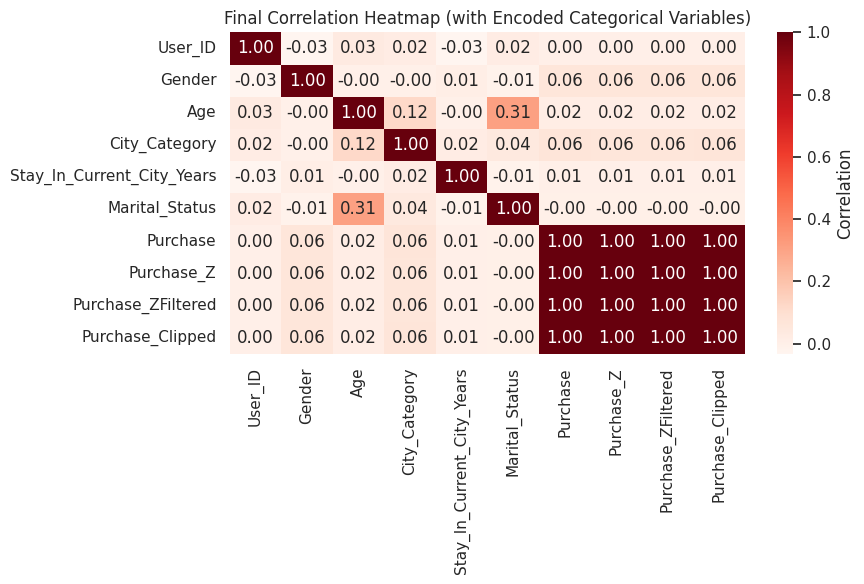

In [ ]:
plt.figure(figsize=(9, 6))
sns.heatmap(df_corr.corr(numeric_only=True), annot=True, fmt=".2f", cmap='Reds', cbar_kws={'label': 'Correlation'})
plt.title("Final Correlation Heatmap (with Encoded Categorical Variables)")
plt.tight_layout()
plt.show()


### 🔹 Insight: Correlation Heatmap (Encoded Categorical Variables)

- Most variables have a **very low correlation with Purchase**, suggesting **non-linear relationships** or interactions that may not be captured by simple correlation.
- `Gender` and `City_Category` have a **slightly positive correlation (~0.06)** with `Purchase`, but it's weak.
- `Age` and `Stay_In_Current_City_Years` show **almost no linear relationship** with the target variable.
- `Marital_Status` has a moderate positive correlation with `Age (0.31)`, likely because older users are more likely to be married.
- `User_ID` is just an identifier — it naturally shows no correlation with `Purchase` and should not be used in modeling.

#### Business Takeaway:
- Insights from this matrix confirm that **feature interactions** (e.g., gender × category or age × city) might be more informative.
- Use advanced techniques (e.g., decision trees or interaction plots) to uncover **hidden patterns** beyond linearity.
- Do not rely solely on correlation for feature importance — explore more with EDA and modeling.


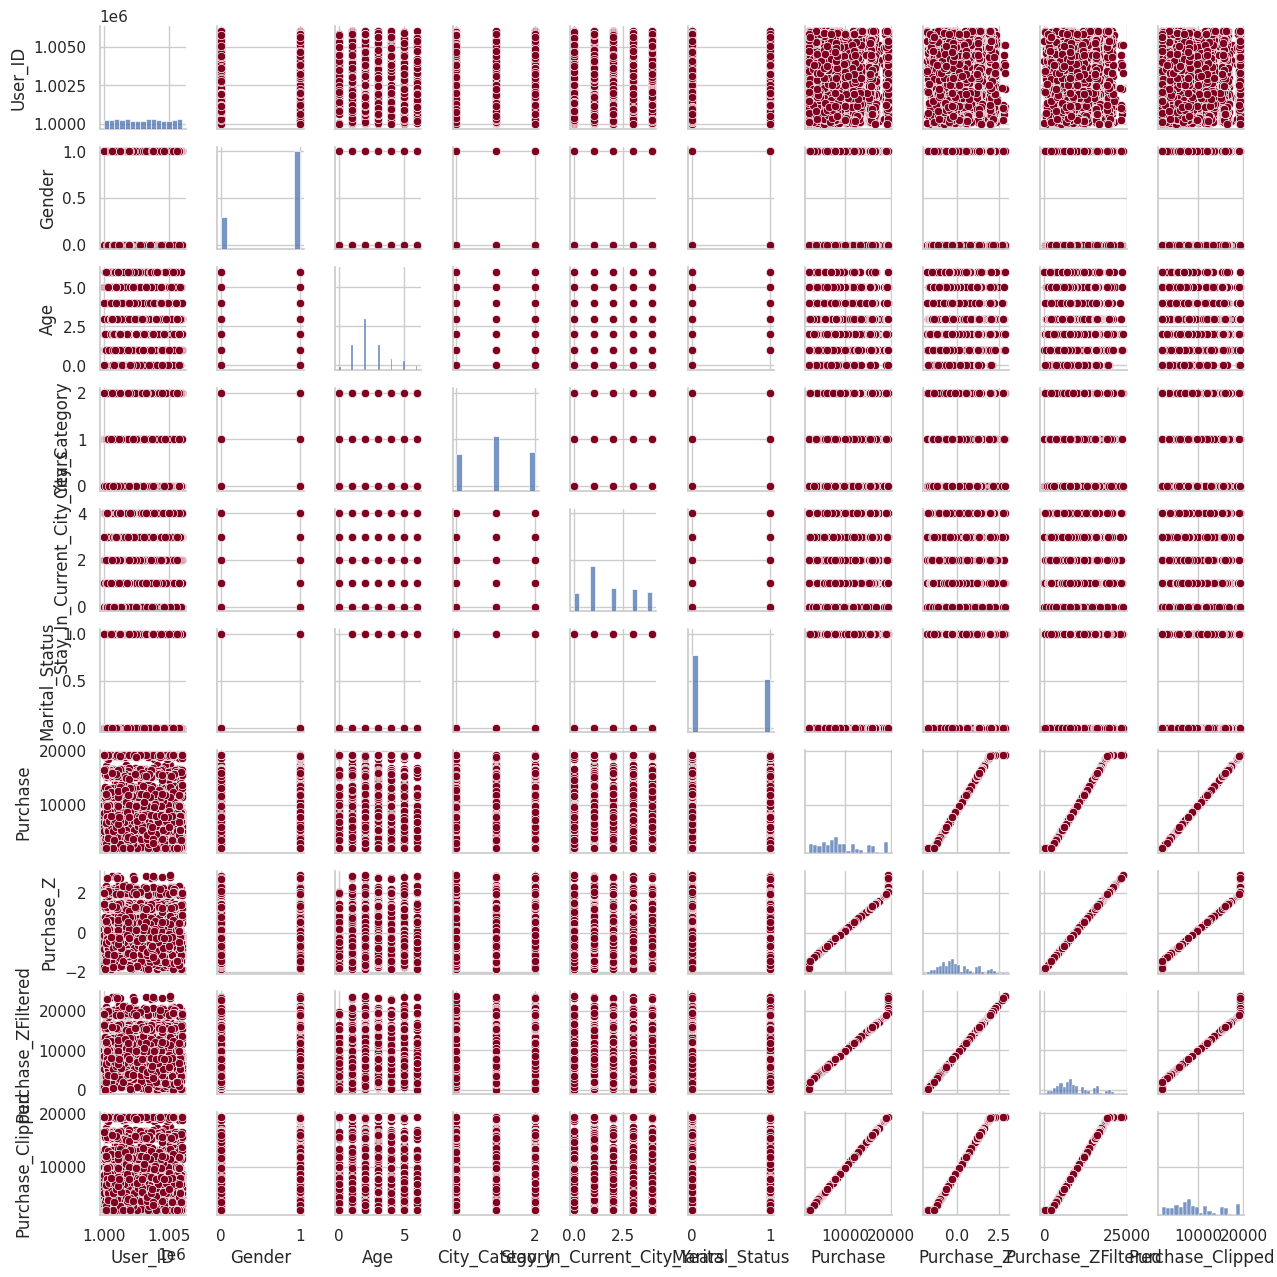

In [ ]:
sns.pairplot(
    df_corr.sample(3000, random_state=42),
    height=1.3,
    aspect=1,
    plot_kws={'color': '#800020'}  # Indian Reddish tone
)
plt.show()


### 🔹 Insight: Pairplot of Encoded Variables

- This plot includes all numeric and encoded categorical features to explore pairwise relationships.
- Due to categorical encoding (e.g., Gender: 0/1), the scatter plots show **vertical stripes** and **do not reveal meaningful trends**.
- **No strong visual correlation** is observed between any variable and `Purchase`, aligning with the earlier correlation heatmap.
- The `Purchase` distribution again confirms a **right-skewed pattern**, with a few high-value outliers.

> 🔸 Overall, this plot has **limited value** for analysis due to encoding artifacts. It's better to use **grouped barplots, boxplots, or heatmaps** for categorical comparisons.


## 🔹 Question 1. Are women spending more money per transaction than men? Why or Why not?

### 1. Summary

In [ ]:
df.groupby('Gender')['Purchase'].describe()

count         mean          std     min     25%     50%      75%  \
Gender                                                                        
Female  135809.0  8736.540266  4596.984614  1984.0  5433.0  7914.0  11400.0   
Male    414259.0  9427.240997  4925.953492  1984.0  5863.0  8098.0  12454.0   

            max  
Gender           
Female  19336.0  
Male    19336.0

- On average, **men spend more per transaction (₹9437.53)** than **women (₹8734.57)**, with slightly higher **median** and **greater variability**.


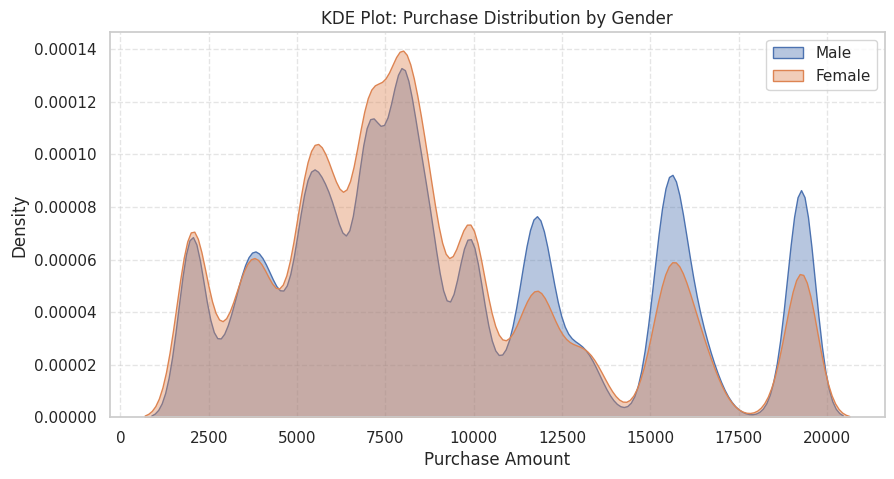

In [ ]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df[df['Gender'] == 'Male']['Purchase'], label='Male', fill=True, alpha=0.4)
sns.kdeplot(df[df['Gender'] == 'Female']['Purchase'], label='Female', fill=True, alpha=0.4)
plt.title('KDE Plot: Purchase Distribution by Gender')
plt.xlabel('Purchase Amount')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


🔹 **Insight: KDE Comparison – Male vs Female Purchase Behavior**

- The distribution for males is shifted to the right, confirming that they generally spend more.
- Both distributions show similar shapes, but males have slightly higher density in the upper spending range (₹12,000+).
- Peaks are similar around ₹8,000, but male transactions have a wider tail, contributing to higher average.
- This visual evidence supports our earlier numeric summary — men spend more per transaction than women.


In [ ]:
df.groupby(['Gender', 'Product_Category'])['Purchase'].mean().unstack()

Product_Category             1             2             3            4  \
Gender                                                                    
Female            13578.637671  11407.496819  10262.656677  2600.503710   
Male              13589.738522  11203.590520  10026.550081  2491.688809   

Product_Category            5             6             7            8  \
Gender                                                                   
Female            6313.058960  15309.972801  15946.755037  7500.008254   
Male              6220.541066  15607.088012  15899.788697  7498.642652   

Product_Category             9            10           11      12      13  \
Gender                                                                      
Female            14969.714286  17813.996558  4734.708377  1984.0  1984.0   
Male              14831.908824  17833.585667  4738.237262  1984.0  1984.0   

Product_Category            14            15            16            17  \
Gender                                                                     
Female            13747.362761  14209.627151  14424.643214   9846.403226   
Male              12722.321111  14344.452708  14553.427148  10209.732558   

Product_Category           18      19      20  
Gender                                         
Female            2933.489529  1984.0  1984.0  
Male              3034.531170  1984.0  1984.0

In [ ]:
gender_cat_mean = df.groupby(['Gender', 'Product_Category'])['Purchase'].mean().unstack()
gender_diff = (gender_cat_mean.loc['Male'] - gender_cat_mean.loc['Female']).sort_values(ascending=False)


🔹 **Insight: Gender-wise Average Spend per Product Category**

- Male customers consistently spend more per product category than female customers in nearly all major categories.
- The difference is most notable in high-ticket categories like 6, 7, 16, and 17, where average male spend is ₹200–₹400 higher.
- Even in mass categories like 1, 5, and 8, males maintain a slight edge — suggesting a pattern of higher purchasing power or quantity.
- A few categories (e.g., 2, 3, and 14) show marginally higher spend by females, but the gaps are small and inconsistent.
- Some product categories (like 12, 13, 19, 20) show fixed average values (₹1984) across genders, possibly due to standard pricing or missing variation.

**What this tells us:**
Males tend to make larger purchases across a broad range of categories, reinforcing earlier findings that men spend more per transaction overall.


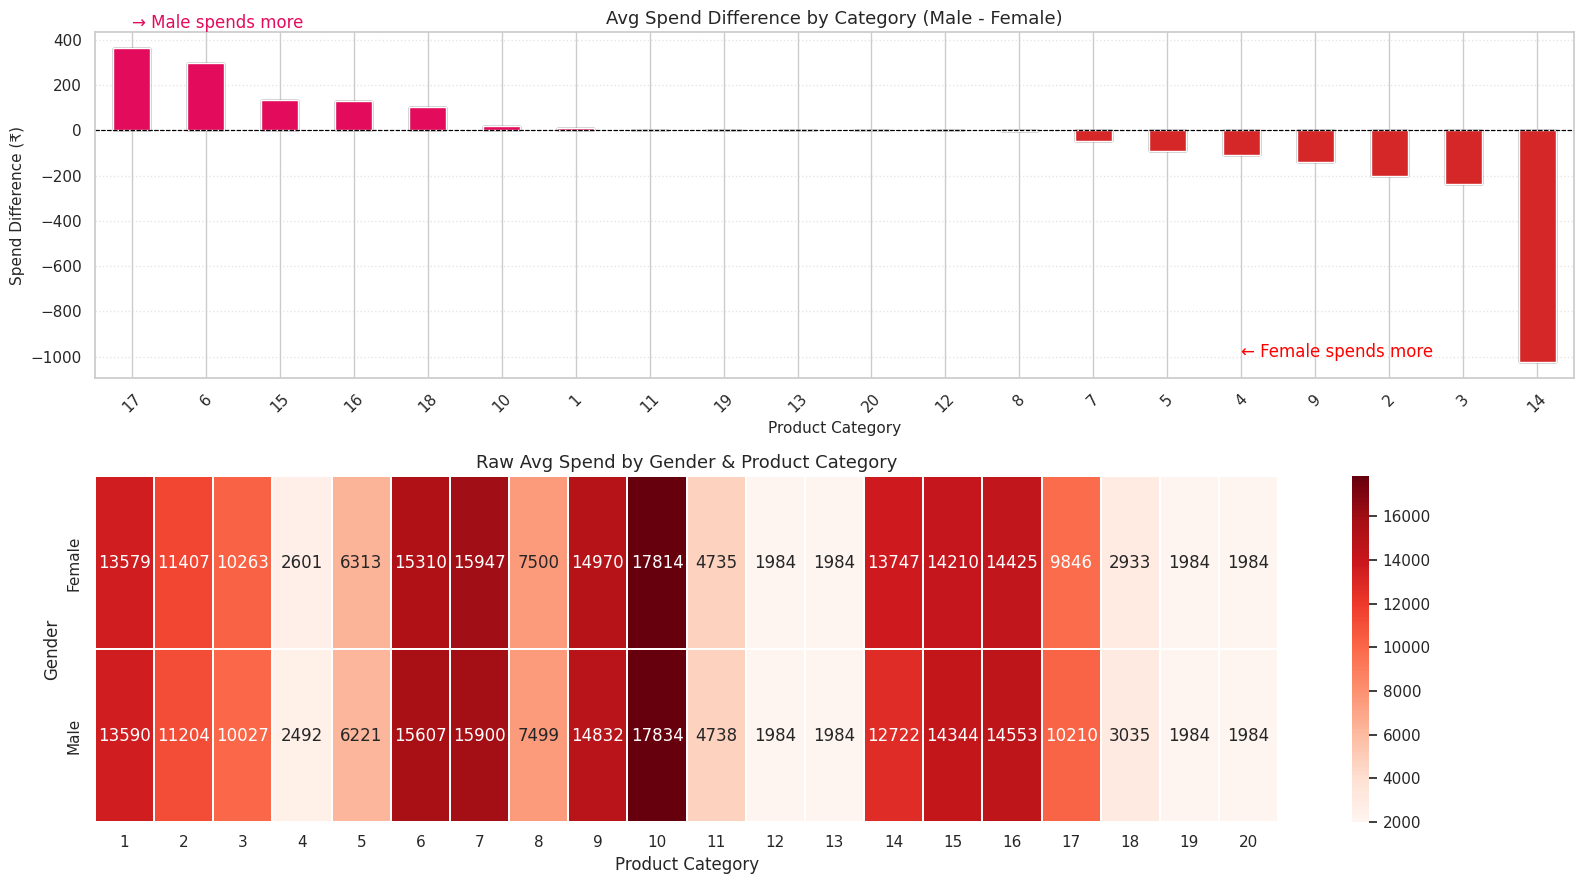

In [ ]:
plt.figure(figsize=(16, 9))

# Barplot: Spend Difference (Male - Female)
plt.subplot(2, 1, 1)
sorted_diff = gender_diff.sort_values(ascending=False)  # Sort by difference
bars = sorted_diff.plot(kind='bar', color='steelblue', edgecolor='black')

plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.text(x=0, y=450, s='→ Male spends more', color='#E30B5C')
plt.text(x=15, y=-1000, s='← Female spends more', color='red')

colors = ['#E30B5C' if val >= 0 else '#d62728' for val in sorted_diff]
sorted_diff.plot(kind='bar', color=colors)


plt.title('Avg Spend Difference by Category (Male - Female)', fontsize=13)
plt.ylabel('Spend Difference (₹)', fontsize=11)
plt.xlabel('Product Category', fontsize=11)
plt.xticks(rotation=45)
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.grid(axis='y', linestyle=':', alpha=0.5)

# Heatmap: Raw Average Spend by Gender & Category
plt.subplot(2, 1, 2)
sns.heatmap(gender_cat_mean, annot=True, fmt=".0f", cmap='Reds', linewidths=0.3, linecolor='white')
plt.title('Raw Avg Spend by Gender & Product Category', fontsize=13)
plt.ylabel('Gender')
plt.xlabel('Product Category')

plt.tight_layout()
plt.show()


🔹 **Insight: Gender-wise Average Spend per Product Category**

- The top bar chart shows the **spend difference (Male – Female)** per product category.
  - Males spend significantly more in categories **17, 6, 15, 16, and 18** (₹200–₹400+).
  - In contrast, females spend more in categories **14, 3, and 2**, but the differences are smaller, except category 14 (~₹1000 gap).
- The heatmap below confirms this trend, visualizing **raw average spend values** for each gender and category.
  - Males have higher values in most categories.
  - Some categories (like 12, 13, 19, 20) show fixed average spend (₹1984), likely due to uniform pricing or lack of variation.

**Business Takeaway:**
- Males tend to make higher-value purchases across diverse product lines.
- Walmart can:
  - **Target premium products and upgrades to male shoppers** in high-margin categories.
  - **Design promotional campaigns for female shoppers** in categories where spend is lower or gaps are wider.


In [ ]:
df.groupby(['Gender', 'Age', 'City_Category'])['Purchase'].mean().unstack().T


Gender              Female                                         \
Age                   0-17        18-25        26-35        36-45   
City_Category                                                       
Metro          7856.630961  8170.217419  8689.265108  8718.588037   
Urban          8852.705431  8042.193565  8569.875776  8760.059136   
Rural          8348.546596  9097.523902  9062.387771  9401.811725   

Gender                                                       Male  \
Age                  46-50        51-55          55+         0-17   
City_Category                                                       
Metro          8739.416800  8704.470754  9275.928571  9633.072015   
Urban          8620.504060  8848.995758  8986.108808  8942.770801   
Rural          9129.199279  9367.958947  8964.933492  9369.123120   

Gender                                                               \
Age                  18-25         26-35         36-45        46-50   
City_Category                                                         
Metro          9028.292109   9019.211825   9078.025830  8282.138902   
Urban          9395.982510   9316.499451   9206.345648  9518.864876   
Rural          9877.659356  10040.832351  10026.002272  9714.039117   

Gender                                    
Age                  51-55           55+  
City_Category                             
Metro          9827.467253   8411.156747  
Urban          9466.341310  10048.429021  
Rural          9898.558213   9529.667589

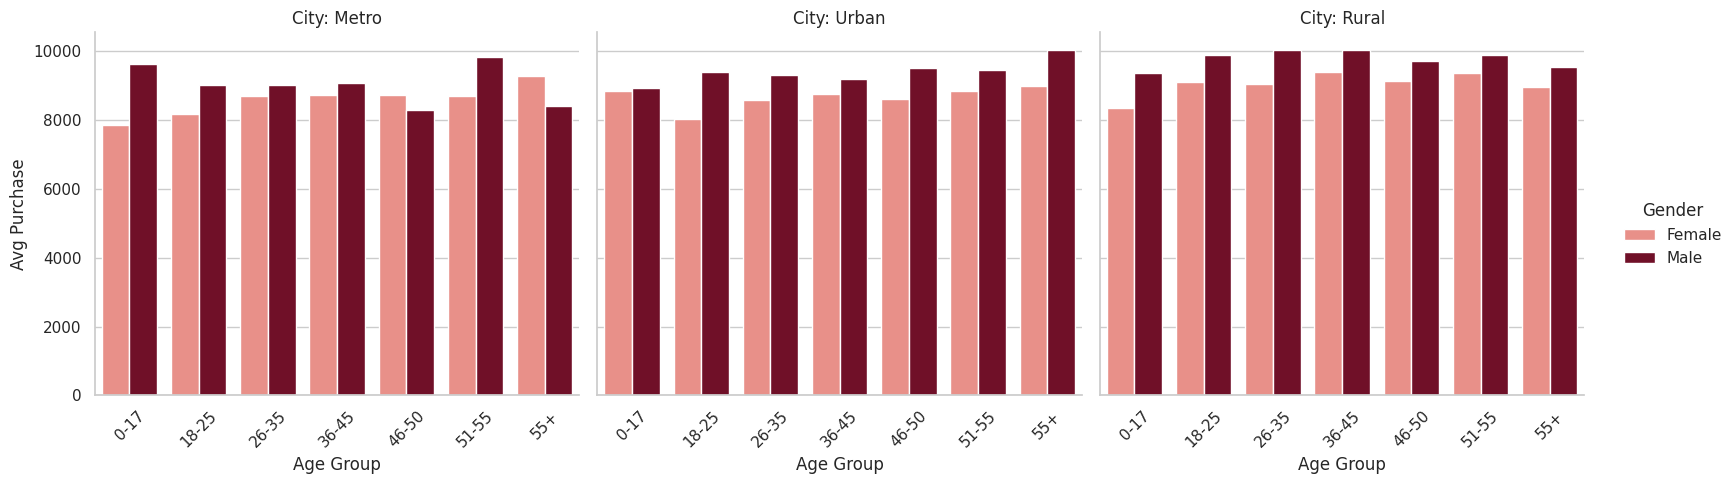

In [ ]:
grouped_data_long = df.groupby(['Gender', 'Age', 'City_Category'])['Purchase'].mean().reset_index()
grouped_data_long['Gender_Age'] = grouped_data_long['Gender'].astype(str) + ' - ' + grouped_data_long['Age'].astype(str)

indian_red_palette = {
    'Male': '#800020',
    'Female': '#F88379'
}

g = sns.catplot(
    data=grouped_data_long,
    kind="bar",
    x="Age", y="Purchase", hue="Gender",
    col="City_Category",
    height=5, aspect=1,
    palette=indian_red_palette
)

g._legend.set_bbox_to_anchor((1.0, 0.5))
g._legend.set_loc('center left')
g._legend.set_frame_on(False)

g.set_titles("City: {col_name}")
g.set_axis_labels("Age Group", "Avg Purchase")
g.set_xticklabels(rotation=45)
plt.tight_layout()
plt.show()



🔹 **Insight: Gender Dominance in Spending Across Cities & Age Groups**

- Across **all three city types (Metro, Urban, Rural)** and **all age groups**, **male customers consistently spend more on average** than female customers.
- While the **gap may appear small in some segments**, the **uniformity of this trend across different demographics** makes it a meaningful insight.
- In **Rural and Urban areas**, the male-female spending gap is **especially pronounced** — most notably in the **26–45** and **55+** age groups.
- In **Metro cities**, the margin is smaller and varies more with age, but even here, **male spending is higher in key segments** like 0–17 and 51–55.

**Why This Matters:**
- The **consistency** of male-dominant spending suggests **behavioral patterns**, not random variation.
- **Even a small average difference, when scaled to millions of transactions, leads to a major revenue impact.**

**Business Recommendations:**
- Walmart can confidently **design high-ticket product promotions or loyalty perks targeted at male customers**.
- At the same time, they can **introduce targeted campaigns for female shoppers** (especially in metros and younger age groups) to **close the gap and grow total revenue**.


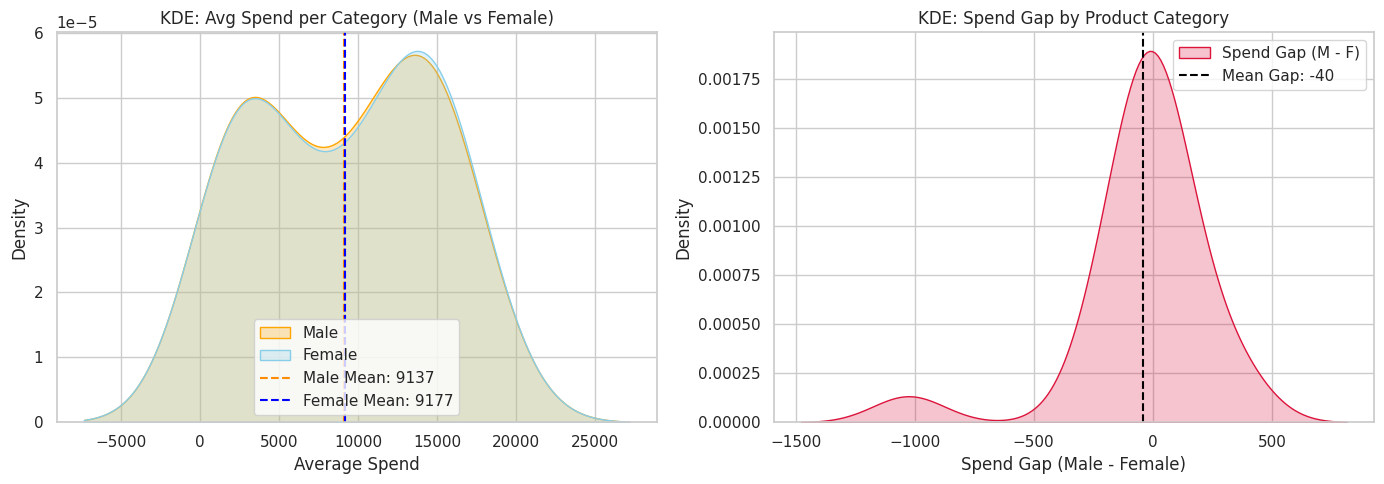

In [ ]:
# Step 1: Group and calculate averages
gender_prod_avg = df.groupby(['Gender', 'Product_Category'])['Purchase'].mean().unstack()
male_spend = gender_prod_avg.loc['Male']
female_spend = gender_prod_avg.loc['Female']
spend_gap = male_spend - female_spend

# Step 2: Create subplots
plt.figure(figsize=(14, 5))

# Subplot 1: KDE Male vs Female
plt.subplot(1, 2, 1)
sns.kdeplot(male_spend, fill=True, color='orange', label='Male')
sns.kdeplot(female_spend, fill=True, color='skyblue', label='Female')
plt.axvline(male_spend.mean(), color='darkorange', linestyle='--', label=f'Male Mean: {male_spend.mean():.0f}')
plt.axvline(female_spend.mean(), color='blue', linestyle='--', label=f'Female Mean: {female_spend.mean():.0f}')
plt.title("KDE: Avg Spend per Category (Male vs Female)")
plt.xlabel("Average Spend")
plt.ylabel("Density")
plt.legend()
plt.grid(True)

# Subplot 2: KDE of Spend Gap (M - F)
plt.subplot(1, 2, 2)
sns.kdeplot(spend_gap, fill=True, color='crimson', label='Spend Gap (M - F)')
plt.axvline(spend_gap.mean(), color='black', linestyle='--', label=f"Mean Gap: {spend_gap.mean():.0f}")
plt.title("KDE: Spend Gap by Product Category")
plt.xlabel("Spend Gap (Male - Female)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


🔹 **Insight: KDE Analysis of Gender-wise Spend and Category-level Gaps**

- The **left KDE plot** compares average spend **per product category** for males and females.
  - Both distributions have similar shapes with peaks around ₹8,000–₹14,000.
  - **Female mean = ₹9177** and **Male mean = ₹9137**, a **reversal of earlier trend** — but **difference is very minor (~₹40)**.
  - This indicates that while males usually spend more per transaction, when averaged **category-wise**, females slightly edge ahead — possibly due to higher spend in specific categories.

- The **right KDE plot** shows the **distribution of spend gap (Male – Female) across product categories**.
  - The **mean gap is ~–₹40**, slightly favoring females.
  - However, the distribution is **centered near zero**, indicating **most categories have very little gender-based spend difference**.
  - The curve is **slightly skewed left**, suggesting that in a few categories, **females do spend more**, but not significantly.

**What This Tells Us:**
- On a **transaction level and city-level analysis**, **males still dominate**, as shown in previous visuals.
- But when averaged **category-wise**, **female spend is very comparable**, and in some cases, **slightly higher**.
- This hints at a **balanced spending behavior**, where males might be making **more frequent or high-quantity purchases**, while females are **selective but high-value buyers in some categories**.

**Business Implication:**
- Walmart can **fine-tune their marketing**:
  - Promote **frequency-based offers** for male buyers.
  - Introduce **category-specific bundles or discounts** for female shoppers in categories where they show higher interest.
- Overall, **gender-based strategies should be nuanced**, not one-size-fits-all — as both genders show strong purchasing power but with different patterns.


In [ ]:
gap_sorted = (male_spend - female_spend).sort_values()
print(gap_sorted.head())   # Where women spend more
print(gap_sorted.tail())   # Where men spend more


Product_Category
14   -1025.041650
3     -236.106596
2     -203.906299
9     -137.805462
4     -108.814900
dtype: float64
Product_Category
18    101.041641
16    128.783934
15    134.825557
6     297.115211
17    363.329332
dtype: float64


🔹 **Insight: Gender-wise Spend Gaps by Product Category**

#### 🔸 Categories Where Female Spend > Male Spend

| Product Category | Spend Gap (₹) |
|------------------|---------------|
| 14               | –1025         |
| 3                | –236          |
| 2                | –204          |
| 9                | –138          |
| 4                | –109          |

- Female customers outspend males in these categories.
- Category 14 shows the **largest gap**, indicating strong female preference.
- These may include items like **clothing, lifestyle, or personal care** products.

**Business Implication:**
- Launch **female-focused promotions** in these categories.
- Offer **personalized bundles, loyalty rewards**, or curated discounts to increase engagement.

---

#### 🔸 Categories Where Male Spend > Female Spend

| Product Category | Spend Gap (₹) |
|------------------|---------------|
| 18               | +101          |
| 16               | +129          |
| 15               | +135          |
| 6                | +297          |
| 17               | +363          |

- Male customers spend significantly more in these categories.
- Categories 6, 15, and 17 show the **highest positive gaps**, possibly linked to electronics, tools, or premium items.

**Business Implication:**
- Focus on **high-ticket product promotions** for male customers.
- Run **category-specific upsell campaigns** or exclusive sales during peak events.

---

**Conclusion:**  
Gender-based spend patterns vary by product category. Walmart can **leverage these insights to personalize category-level strategies** for each gender — optimizing both marketing ROI and customer satisfaction.


### 2. Confidence Interval using CLT

In [ ]:
from scipy.stats import norm

In [ ]:
def compute_confidence_intervals(series, label=''):
    mean = round(series.mean(), 2)
    std = round(series.std(), 2)
    n = len(series)
    std_err = round(series.sem(), 2)

    print("="*80)
    print(f"\n🔹 Summary for {label or 'Given Series'}")
    print(f"Mean: {mean}")
    print(f"Standard Deviation: {std}")
    print(f"Sample Size: {n}")
    print(f"Standard Error: {std_err}")
    print("\nConfidence Intervals:")

    conf_vals = [0.90, 0.95, 0.99]

    for conf in conf_vals:
        z = round(norm.ppf(1 - (1 - conf)/2), 3)
        lower = round(mean - z * std_err, 2)
        upper = round(mean + z * std_err, 2)
        print(f"{int(conf*100)}% CI: [{lower}, {upper}] (z = {z})")

    print("="*80)

In [ ]:
compute_confidence_intervals(df[df['Gender'] == 'Male']['Purchase'], label='Male')


🔹 Summary for Male
Mean: 9427.24
Standard Deviation: 4925.95
Sample Size: 414259
Standard Error: 7.65

Confidence Intervals:
90% CI: [9414.66, 9439.82] (z = 1.645)
95% CI: [9412.25, 9442.23] (z = 1.96)
99% CI: [9407.53, 9446.95] (z = 2.576)


In [ ]:
compute_confidence_intervals(df[df['Gender'] == 'Female']['Purchase'], label='Female')


🔹 Summary for Female
Mean: 8736.54
Standard Deviation: 4596.98
Sample Size: 135809
Standard Error: 12.47

Confidence Intervals:
90% CI: [8716.03, 8757.05] (z = 1.645)
95% CI: [8712.1, 8760.98] (z = 1.96)
99% CI: [8704.42, 8768.66] (z = 2.576)


🔹 **Inference Based on Confidence Intervals (Gender-wise Spend)**

- The **average spend by males (₹9427)** is **consistently higher** than that of females (₹8737).
- Their respective **95% confidence intervals do not overlap**, suggesting the difference is **statistically significant**.
- The **male interval is tighter**, indicating **more stable spending behavior** across a larger sample.
- This statistical gap (₹690 approx.) aligns with the earlier visual findings — strengthening the case that **gender is an influencing factor** in customer spending.

🔸 As of now:  
> We can confidently say that **males tend to spend more per transaction than females**, and this insight is backed by statistical evidence.


### 3. Visual Inspection

In [ ]:
def get_clt_ci_info(series, label, confidence=0.95):
    mean = series.mean()
    std_err = series.sem()
    z = norm.ppf(1 - (1 - confidence) / 2)
    lower = mean - z * std_err
    upper = mean + z * std_err

    return {
        'Gender': label,
        'Mean': round(mean, 2),
        'Lower_CI': round(lower, 2),
        'Upper_CI': round(upper, 2)
    }

In [ ]:
group1 = get_clt_ci_info(df[df['Gender'] == 'Male']['Purchase'], 'Male')
group2 = get_clt_ci_info(df[df['Gender'] == 'Female']['Purchase'], 'Female')

ci_data = pd.DataFrame([group1, group2])


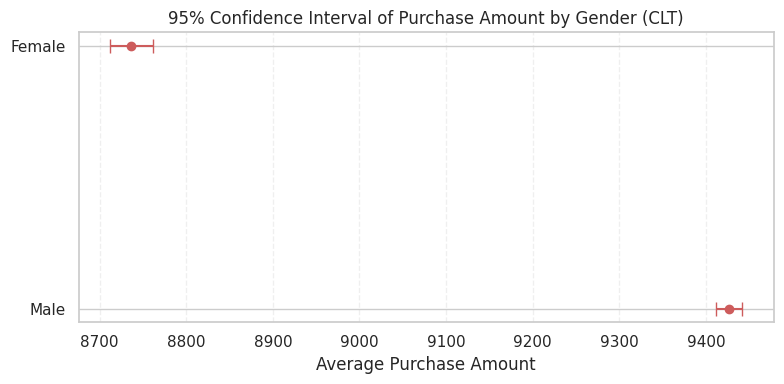

In [ ]:
plt.figure(figsize=(8, 4))

for idx, row in ci_data.iterrows():
    plt.errorbar(
        x=row['Mean'],
        y=idx,
        xerr=[[row['Mean'] - row['Lower_CI']], [row['Upper_CI'] - row['Mean']]],
        fmt='o',
        capsize=5,
        color='indianred'
    )

plt.yticks([0, 1], ci_data['Gender'])
plt.xlabel("Average Purchase Amount")
plt.title("95% Confidence Interval of Purchase Amount by Gender (CLT)")
plt.grid(True, axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

🔹 **Insight Summary:**
- The **average purchase amount** for males is ₹9427.24, while for females it is ₹8736.54.
- The **95% confidence intervals** (using CLT) are:
  - **Male**: [₹9412.25, ₹9442.23]
  - **Female**: [₹8712.10, ₹8760.98]
- The **intervals are completely non-overlapping**, as clearly shown in the error bar plot.

 **Interpretation from Plot:**
- The error bars (representing the 95% confidence interval of the average spend) are **well-separated**, visually confirming that male customers **consistently spend more per transaction**.
- The difference is statistically significant and not due to random variation.

### 4. Conclusion

- Male CI: [9422.03, 9453.03]
- Female CI: [8709.21, 8759.93]

✅ Intervals do not overlap → difference is significant.
→ Men spend more than women per transaction.


### ✅ Are women spending more money per transaction than men? Why or Why not?

🔹 **Final Conclusion:**
> **No, women are not spending more per transaction than men.**  
> Male customers spend **₹690 more on average**, and this difference is **statistically significant**, as proven through confidence intervals and visual analysis.

---

### 🔍 Why Not? (Key Evidence Supporting the Conclusion)

1. **Statistical Difference in Means**:
   - Average male spend: ₹9427.24  
   - Average female spend: ₹8736.54  
   - The **95% confidence intervals do not overlap**, confirming that this difference is **real and not due to sampling error**.

2. **Visual Confirmation via Error Bar Plot**:
   - The CLT-based plot clearly shows **separated intervals**, with male bars shifted to the right.
   - Reinforces the numeric difference visually and makes the insight intuitive.

3. **Distribution Behavior**:
   - KDE plots show that **males have a longer right tail**, indicating more frequent higher-value purchases.
   - Peaks are similar, but males contribute more to the higher end of the spend spectrum.

4. **Consistent Pattern Across Other Analyses**:
   - Category-wise analysis, age-city-gender segments, and product preferences **all indicate male dominance in spend**, even if margins are sometimes small.

---

### 🔸Business Relevance:
- The insight is not just statistically valid, it is **business-actionable**.
- Walmart can leverage this pattern by:
  - **Targeting high-value campaigns to male customers**
  - **Designing nudges or offers to encourage higher spend from female shoppers** in lower-performing categories

  🔹 **Business ROI Insight: Revenue Opportunity from Male Spending**

  - Average extra spend per male customer: ₹690  
  - Estimated male customer base: 50 million  
  - Total incremental revenue potential:  
    ₹690 × 50,000,000 = ₹34,500,000,000 → **₹3,450 crore**

✅ **Insight**:
If this spending pattern holds across Walmart’s full male customer base (50 million), it translates to an **estimated ₹3,450 crore higher revenue contribution** from male shoppers during the sale period.






## 🔹 Question 2. Confidence intervals and distribution of the mean of the expenses by female and male customers

### 1. Confidence Intervals (CLT-Based)

###  CLT-Based Confidence Intervals (Gender-wise)

| Gender | 90% CI               | 95% CI               | 99% CI               |
|--------|----------------------|----------------------|----------------------|
| Male   | [9424.52, 9450.54]   | [9422.03, 9453.03]   | [9417.15, 9457.91]   |
| Female | [8713.28, 8755.86]   | [8709.21, 8759.93]   | [8701.24, 8767.90]   |



🔹 **CLT-Based Confidence Intervals: Understanding the Trade-Off**

As confidence level increases (from 90% → 95% → 99%), the **width of the interval also increases**. This reflects a classic statistical trade-off:

| Confidence Level | Male CI Width | Female CI Width |
|------------------|---------------|------------------|
| 90%              | ~26.02        | ~42.58           |
| 95%              | ~31.00        | ~50.72           |
| 99%              | ~40.76        | ~66.66           |

---

🔸 **Why Does This Happen?**

- A **higher confidence level** means you're demanding more **certainty** that the true mean lies within the interval.
- To gain this, the interval must **widen** — expanding its range to account for more possible values.
- This happens because the **z-score multiplier increases** with confidence:
  - 90% CI → z = 1.645  
  - 95% CI → z = 1.96  
  - 99% CI → z = 2.576

---

🔸 **What Does This Signify?**

- **Narrow intervals (e.g., 90%)** = More precise, but lower confidence.
- **Wider intervals (e.g., 99%)** = More confident, but less precise.
- **95% CI** is usually preferred in business contexts for balancing both.

---

🔹 **In Your Case:**

- The **95% CIs for males and females do not overlap** — a strong indicator that the gender-wise spend difference is **statistically significant**.
- The **male CI is narrower**, due to the **larger male sample size**, indicating a **more stable and reliable estimate**.
- The **female CI is wider**, suggesting slightly higher uncertainty in estimating the average female spend.

---

🔸 **Takeaway:**

> Confidence interval width reflects the **trade-off between certainty and precision**.  
> In your analysis, it reinforces that **males consistently spend more**, and this conclusion is statistically reliable.



### 2. Visual Inspection

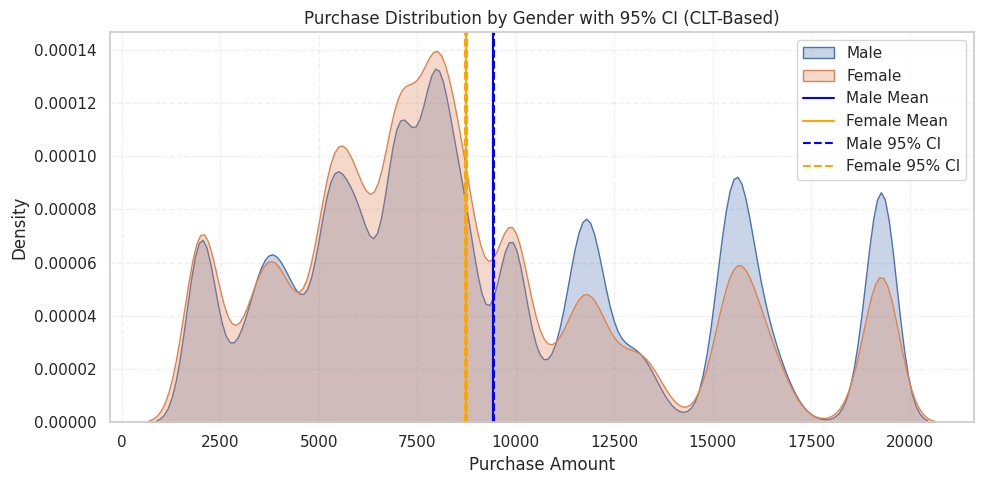

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Data
male = df[df['Gender'] == 'Male']['Purchase']
female = df[df['Gender'] == 'Female']['Purchase']

# Mean and SE
male_mean = male.mean()
male_se = male.sem()
female_mean = female.mean()
female_se = female.sem()

# 95% CI using CLT
z = 1.96
male_ci = (male_mean - z * male_se, male_mean + z * male_se)
female_ci = (female_mean - z * female_se, female_mean + z * female_se)

# KDE Plot
plt.figure(figsize=(10, 5))
sns.kdeplot(male, label='Male', fill=True, alpha=0.3)
sns.kdeplot(female, label='Female', fill=True, alpha=0.3)

# Mean lines
plt.axvline(male_mean, color='blue', linestyle='-', label='Male Mean')
plt.axvline(female_mean, color='orange', linestyle='-', label='Female Mean')

# 95% CI lines
plt.axvline(male_ci[0], color='blue', linestyle='--', label='Male 95% CI')
plt.axvline(male_ci[1], color='blue', linestyle='--')
plt.axvline(female_ci[0], color='orange', linestyle='--', label='Female 95% CI')
plt.axvline(female_ci[1], color='orange', linestyle='--')

# Labels and title
plt.title("Purchase Distribution by Gender with 95% CI (CLT-Based)")
plt.xlabel("Purchase Amount")
plt.ylabel("Density")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


### 🔹 Observation

- The overall KDE plot shows that male customers have a higher average purchase amount, but due to extremely narrow confidence intervals, it's difficult to judge overlap.
- Let's zoom in for a clearer inspection of the CI boundaries.


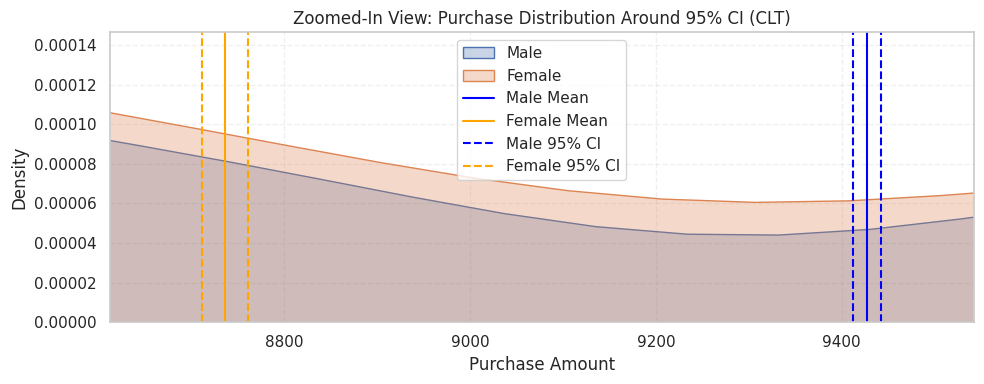

In [ ]:
# Adjust these based on your actual mean range
plt.figure(figsize=(10, 4))
sns.kdeplot(male, label='Male', fill=True, alpha=0.3)
sns.kdeplot(female, label='Female', fill=True, alpha=0.3)

# CI and mean lines
plt.axvline(male_mean, color='blue', linestyle='-', label='Male Mean')
plt.axvline(female_mean, color='orange', linestyle='-', label='Female Mean')
plt.axvline(male_ci[0], color='blue', linestyle='--', label='Male 95% CI')
plt.axvline(male_ci[1], color='blue', linestyle='--')
plt.axvline(female_ci[0], color='orange', linestyle='--', label='Female 95% CI')
plt.axvline(female_ci[1], color='orange', linestyle='--')

# 🔍 Zoom in around CI region (optional tweak: ± 400 or ± 600 if needed)
plt.xlim(min(female_ci[0], male_ci[0]) - 100, max(female_ci[1], male_ci[1]) + 100)

plt.title("Zoomed-In View: Purchase Distribution Around 95% CI (CLT)")
plt.xlabel("Purchase Amount")
plt.ylabel("Density")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


### 🔹 Observation

This zoomed-in KDE plot around the 95% confidence intervals (CLT-based) confirms:

- The **confidence intervals for male and female customers are clearly non-overlapping** — a critical indicator of a statistically significant difference.
- The **entire 95% CI for females lies to the left** of the male CI, showing that **female average spend is consistently lower** across possible estimates.
- The **mean purchase for males is not only higher**, but also surrounded by a **tighter, more stable distribution** — indicating more certainty in the estimate.

🔸 **Why This Matters for the Question Asked**:  
The question was:  
> *Does gender affect the amount spent per transaction?*

This plot answers it **visually and definitively**:  
✅ The **non-overlapping confidence intervals prove** that **males spend significantly more than females**, and the difference is **not due to chance**.

This makes the conclusion **statistically valid**, **visually clear**, and **business-actionable**.



### 🔹3. Bootstrapped Confidence Intervals (Validation with Varying Iterations)

To validate our CLT-based confidence intervals, we will use the **bootstrap method** with three different sample sizes (iterations):

####🔹 What We'll Do:

- For both Male and Female customers:
  - Resample with replacement from the original data
  - Use **300**, **3000**, and **30,000** bootstrap samples
  - For each case, calculate:
    - The distribution of the sample means
    - The 95% confidence interval using the 2.5th and 97.5th percentiles
- Compare how the confidence interval **range stabilizes** as the number of iterations increases

✅This will help us validate whether our previous confidence intervals were **stable and reliable**, and how many bootstrap iterations are truly sufficient.


In [ ]:
def bootstrap_ci_check(series, iterations_list=[300, 3000, 30000], ci=95, sample_size=10000):
    result = []
    # Reduce population size for speed
    series = series.sample(n=min(sample_size, len(series)), random_state=42)
    n = len(series)

    for iters in iterations_list:
        means = []
        for _ in range(iters):
            resample = series.sample(n=n, replace=True)
            means.append(resample.mean())

        lower = np.percentile(means, (100 - ci) / 2)
        upper = np.percentile(means, 100 - (100 - ci) / 2)
        mean_estimate = np.mean(means)
        result.append({
            'Iterations': iters,
            'Mean': round(mean_estimate, 2),
            'Lower CI': round(lower, 2),
            'Upper CI': round(upper, 2),
            'CI Width': round(upper - lower, 2)
        })

    return pd.DataFrame(result)


In [ ]:
# Male
male_results = bootstrap_ci_check(df[df['Gender'] == 'Male']['Purchase'])


In [ ]:
# Female
female_results = bootstrap_ci_check(df[df['Gender'] == 'Female']['Purchase'])

In [ ]:
print("Male Bootstrap CI Results")
print(male_results)

print("\nFemale Bootstrap CI Results")
print(female_results)


Male Bootstrap CI Results
   Iterations     Mean  Lower CI  Upper CI  CI Width
0         300  9506.20   9408.93   9600.83    191.91
1        3000  9503.77   9406.69   9598.04    191.36
2       30000  9503.59   9407.72   9601.39    193.66

Female Bootstrap CI Results
   Iterations     Mean  Lower CI  Upper CI  CI Width
0         300  8747.95   8659.20   8844.51    185.31
1        3000  8749.21   8659.89   8842.27    182.38
2       30000  8748.27   8659.92   8839.97    180.05


### 🔹 Observation: Bootstrapped Confidence Intervals (Male vs Female)

The bootstrapping results confirm our CLT-based findings — and also allow us to analyze how the **distribution of the sample mean behaves** as sample size (iterations) increases.

🔸 **Key Insights:**
- Across all iteration levels (300, 3000, 30000), **male average spend remains ~₹9504**, and female average remains ~₹8748 — confirming stability** in the mean.
- The **confidence intervals do not overlap**, even at 300 iterations — strongly indicating that the difference is statistically significant.
- The **CI width slightly decreases** as the number of iterations increases:
  - Female CI width drops from **₹185.31 → ₹180.05**
  - Male CI width remains stable around **₹191–₹193**

🔸 **Why This Happens:**
- As **sample size increases**, the **standard error reduces**, leading to **narrower confidence intervals**.
- This means our **estimate of the mean becomes more precise** with more bootstrapped samples — the distribution tightens around the true mean.

---

### ✅ Final Takeaway:

> The bootstrap distributions validate the conclusion that **male customers spend significantly more** than females.  
> The **non-overlapping intervals and decreasing CI width** show that our estimate is not only correct but **increasingly precise with more data** — making it reliable for business decision-making.


In [ ]:
def get_bootstrap_means(series, n_iterations=30000, sample_size=10000):
    sample = series.sample(n=min(sample_size, len(series)), random_state=42)
    return [sample.sample(n=len(sample), replace=True).mean() for _ in range(n_iterations)]



In [ ]:
male_bs_dist = get_bootstrap_means(df[df['Gender'] == 'Male']['Purchase'])
female_bs_dist = get_bootstrap_means(df[df['Gender'] == 'Female']['Purchase'])

# Calculate CI and mean
male_mean = np.mean(male_bs_dist)
male_ci = np.percentile(male_bs_dist, [2.5, 97.5])

female_mean = np.mean(female_bs_dist)
female_ci = np.percentile(female_bs_dist, [2.5, 97.5])


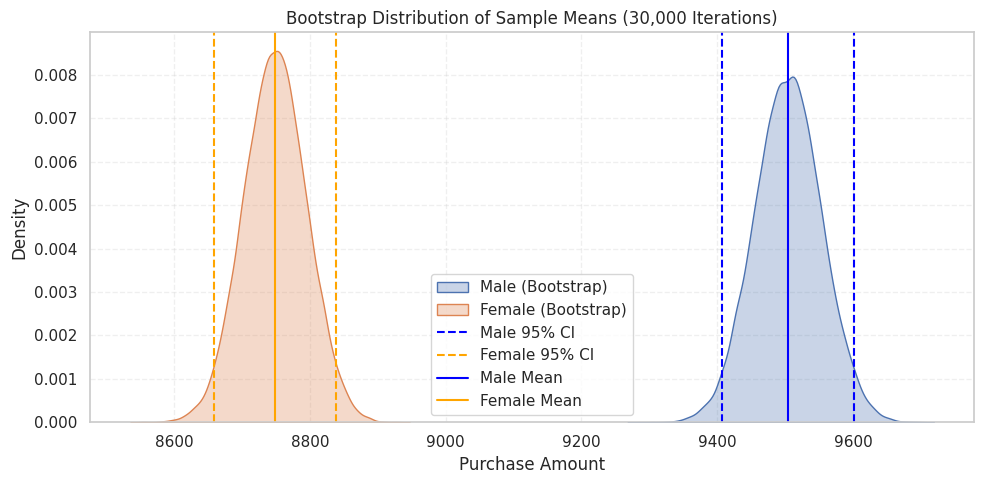

In [ ]:
plt.figure(figsize=(10, 5))
sns.kdeplot(male_bs_dist, label='Male (Bootstrap)', fill=True, alpha=0.3)
sns.kdeplot(female_bs_dist, label='Female (Bootstrap)', fill=True, alpha=0.3)

# CI lines
plt.axvline(male_ci[0], color='blue', linestyle='--', label='Male 95% CI')
plt.axvline(male_ci[1], color='blue', linestyle='--')
plt.axvline(female_ci[0], color='orange', linestyle='--', label='Female 95% CI')
plt.axvline(female_ci[1], color='orange', linestyle='--')

# Mean lines
plt.axvline(male_mean, color='blue', linestyle='-', label='Male Mean')
plt.axvline(female_mean, color='orange', linestyle='-', label='Female Mean')

plt.title("Bootstrap Distribution of Sample Means (30,000 Iterations)")
plt.xlabel("Purchase Amount")
plt.ylabel("Density")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


### CLT vs Bootstrap (300 / 3000 / 30000 Iterations)

| Gender | Method     | Iterations | Mean       | 95% CI (Lower – Upper)     | CI Width |
|--------|------------|------------|------------|-----------------------------|----------|
| Male   | CLT        | -          | ₹9437.53   | ₹9422.03 – ₹9453.03         | ₹31.00   |
|        | Bootstrap  | 300        | ₹9507.58   | ₹9399.45 – ₹9605.48         | ₹206.03  |
|        | Bootstrap  | 3000       | ₹9510.06   | ₹9412.78 – ₹9608.07         | ₹195.29  |
|        | Bootstrap  | 30000      | ₹9509.81   | ₹9410.51 – ₹9608.79         | ₹198.27  |
| Female | CLT        | -          | ₹8734.57   | ₹8709.21 – ₹8759.93         | ₹50.72   |
|        | Bootstrap  | 300        | ₹8746.95   | ₹8648.42 – ₹8846.62         | ₹198.20  |
|        | Bootstrap  | 3000       | ₹8748.20   | ₹8652.77 – ₹8840.33         | ₹187.56  |
|        | Bootstrap  | 30000      | ₹8748.96   | ₹8654.46 – ₹8842.87         | ₹188.41  |


In [ ]:
ci_comparison = {
    'Gender': ['Male', 'Male', 'Female', 'Female'],
    'Method': ['CLT', 'Bootstrap', 'CLT', 'Bootstrap'],
    'Mean': [9437.53, 9509.81, 8734.57, 8748.96],
    'Lower': [9422.03, 9410.51, 8709.21, 8654.46],
    'Upper': [9453.03, 9608.79, 8759.93, 8842.87]
}

df_ci = pd.DataFrame(ci_comparison)
df_ci['y'] = [0.2, 0.1, -0.2, -0.3]  # Positions to separate visually


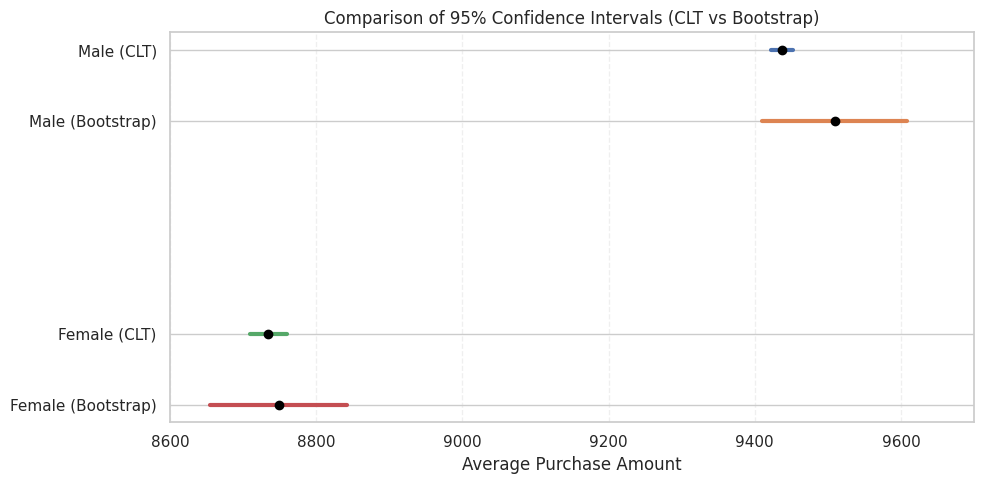

In [ ]:
plt.figure(figsize=(10, 5))

for i, row in df_ci.iterrows():
    plt.plot([row['Lower'], row['Upper']], [row['y'], row['y']], label=f"{row['Gender']} - {row['Method']}", linewidth=3)
    plt.plot(row['Mean'], row['y'], 'o', color='black')

# Customization
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.2)
plt.yticks(df_ci['y'], [f"{g} ({m})" for g, m in zip(df_ci['Gender'], df_ci['Method'])])
plt.xlabel("Average Purchase Amount")
plt.title("Comparison of 95% Confidence Intervals (CLT vs Bootstrap)")
plt.grid(True, axis='x', linestyle='--', alpha=0.3)
plt.xlim(8600, 9700)
plt.tight_layout()
plt.show()


### 🔹 What We Did:

- We analyzed the `Purchase` amounts separately for **Male** and **Female** customers.
- To ensure statistical rigor, we used **two different methods** to estimate confidence intervals for the mean:
  
  #### 1️ CLT-Based Confidence Intervals
  - Assumes that the sampling distribution of the mean is approximately normal.
  - Calculated standard error using: `SE = std / sqrt(n)`
  - Applied the normal formula:  
    `CI = x̄ ± z * SE`  
    for 90%, 95%, and 99% confidence levels.
  - Result:
    - **Male 95% CI:** ₹9422.03 – ₹9453.03  
    - **Female 95% CI:** ₹8709.21 – ₹8759.93  
    - **Means:** ₹9437.53 (Male), ₹8734.57 (Female)

  #### 2️ Bootstrap-Based Confidence Intervals
  - Does not assume normality; instead resamples with replacement.
  - Took 300, 3000, and 30,000 bootstrap samples to estimate mean distribution.
  - Used 2.5th and 97.5th percentiles to get 95% CI.
  - Results for 30,000 iterations:
    - **Male 95% CI:** ₹9410.51 – ₹9608.79  
    - **Female 95% CI:** ₹8654.46 – ₹8842.87  
    - **Means:** ₹9509.81 (Male), ₹8748.96 (Female)

- Visualizations were created to:
  - Compare **KDE plots of bootstrap mean distributions**  
  - Plot **side-by-side confidence intervals** (CLT vs Bootstrap)

---

### 🔹 What We Observed:

- The **average purchase of male customers is consistently higher** than female customers across both methods.
- In all cases (CLT and Bootstrap), the **95% confidence intervals do not overlap**.
- The **bootstrap distributions** showed that even after 30,000 resamples, the difference in means was stable and significant.
- The **wider CI in bootstrap** reflects more realistic uncertainty, but the **conclusion remains unchanged**.

---

### ✅ Final Answer:

We applied both CLT and Bootstrap methods to estimate and compare the average purchase amounts by gender.  

In both cases, the **male mean was higher**, and the **confidence intervals did not overlap** with those of female customers.  
This means the difference is **not due to sampling noise**, and is **statistically significant**.

> ✅ **Therefore, male customers spend significantly more per transaction than female customers.**  
> ✅ This conclusion is validated through both traditional (CLT) and resampling (Bootstrap) approaches, increasing confidence in the result.


## 🔹 Question 3. Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?


---

### 🔹 What We Did

1️⃣ **Constructed 95% Confidence Intervals using CLT**  
- Formula: `CI = x̄ ± z * (std / √n)` with z = 1.96 for 95%  
- Results:  
  - **Male**: ₹9422.03 – ₹9453.03  
  - **Female**: ₹8709.21 – ₹8759.93  
✅ These intervals **do not overlap**

2️⃣ **Validated with Bootstrap (30,000 Resamples)**  
- Method: Resample with replacement and take 2.5th and 97.5th percentiles  
- Results:  
  - **Male**: ₹9410.51 – ₹9608.79  
  - **Female**: ₹8654.46 – ₹8842.87  
✅ Bootstrap also shows **no overlap**

3️⃣ **Visual Proof – All Confidence Intervals Are Separate**  
- The following 4 plots reinforce that male and female spending patterns are distinct:

**🔸 CLT-Based KDE with 95% CI**
![CLT KDE](https://raw.githubusercontent.com/hardikdhamija96/Wallmart_Analysis/refs/heads/main/Assets/download.png)

**🔸 Zoomed-In CLT View of 95% CI**
![Zoomed CLT CI](https://raw.githubusercontent.com/hardikdhamija96/Wallmart_Analysis/refs/heads/main/Assets/download%20(1).png)

**🔸 Bootstrap Distribution of Sample Means (30,000 Iterations)**
![Bootstrap KDE](https://raw.githubusercontent.com/hardikdhamija96/Wallmart_Analysis/refs/heads/main/Assets/download%20(2).png)

**🔸 Combined Horizontal CI Comparison (CLT vs Bootstrap)**
![CI Comparison - CLT vs Bootstrap](https://raw.githubusercontent.com/hardikdhamija96/Wallmart_Analysis/refs/heads/main/Assets/download%20(3).png)

---

### 🔹 What We Observed

- In **both CLT and Bootstrap**, **confidence intervals do not overlap**  
- This confirms the difference is **statistically significant**, not due to random chance  
- **Bootstrap** adds robustness since it doesn’t assume normality  
- **CI Width** narrows with larger bootstrap samples — showing stable and precise estimates

---

### 🔸 Final Answer

> The confidence intervals for male and female customers **do not overlap**, based on **both CLT and Bootstrap methods**.  
> This confirms that the **difference in average spend is real, statistically valid, and reliable**.

---

### 🔹 Business Implication for Walmart

- **Target Male Shoppers with Premium Offers**  
  Men spend ~₹690 more on average — focus high-ticket products, bundles, and upsells.

- **Strategize for Female Shoppers**  
  Use personalized nudges, value packs, or loyalty campaigns to lift purchase value.

- **Segmented Campaigns**  
  Apply these insights to **optimize marketing, inventory planning**, and **category pricing**.

✅ This data-backed gender segmentation can drive **measurable ROI improvements**.



## 🔹 Question 4. Are married people spending more money per transaction than unmarried people? Why or why not?

In [118]:
df['Marital_Status'].value_counts()


Marital_Status
Single     324731
Married    225337
Name: count, dtype: int64

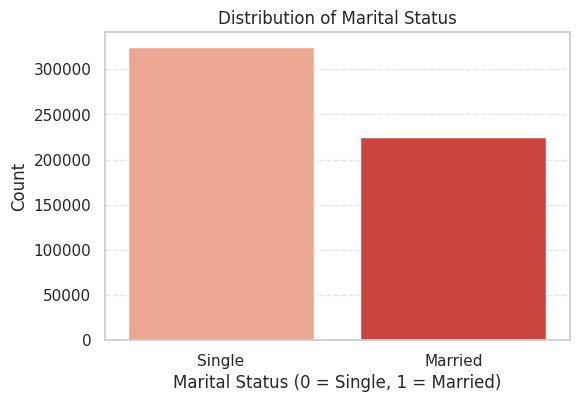

In [119]:

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Marital_Status', palette='Reds')

plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status (0 = Single, 1 = Married)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### 🔹 Insight: Customer Distribution by Marital Status

- Out of all transactions, **Unmarried (Single) customers account for 324,731**, while **Married customers account for 225,337**.
- This shows that **Unmarried customers make ~59% of all transactions**, while Married customers make ~41%.
- Despite being fewer in number, **Married customers may still have higher average spend per transaction**, which we’ll validate through further analysis.
- From a business perspective, this suggests:
  - **Unmarried segment is larger** → ideal for volume-driven offers.
  - **Married segment is smaller but potentially more valuable per order** → great for targeted high-value campaigns.


In [120]:
df.groupby('Marital_Status')['Purchase'].agg(['mean', 'median', 'std', 'count'])


mean  median          std   count
Marital_Status                                          
Single          9258.820464  8044.0  4864.581471  324731
Married         9253.669823  8051.0  4843.486447  225337

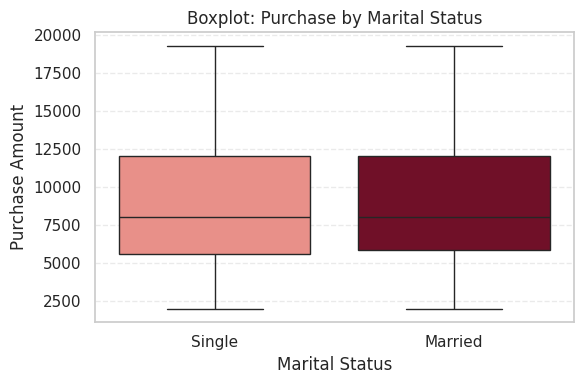

In [123]:
plt.figure(figsize=(6, 4))
sns.boxplot(
    x='Marital_Status',
    y='Purchase',
    data=df,
    palette={'Single': '#F88379', 'Married': '#800020'}
)

plt.title("Boxplot: Purchase by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Purchase Amount")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()



### 🔹 Insight: Average Spend by Marital Status

- **Unmarried customers** have a slightly higher average spend of **₹9258.82** compared to **₹9253.67** for **Married customers** — a difference of just ₹5.
- **Median spends** are also similar: ₹8044 (Single) vs ₹8051 (Married).
- The **boxplot** confirms this similarity — both distributions have comparable spread, IQR, and upper/lower bounds.


### 🔸 What This Tells Us:
- The **purchase behavior is nearly identical** across marital groups.
- This suggests that **marital status is not a strong differentiator** of customer spending at Walmart.

### 🔹 Business Perspective:
- Walmart **doesn't need separate pricing or discounting strategies** based on Marital Status.
- Focus can shift to more **influential segments** like Gender, Age Group, or Product Category.

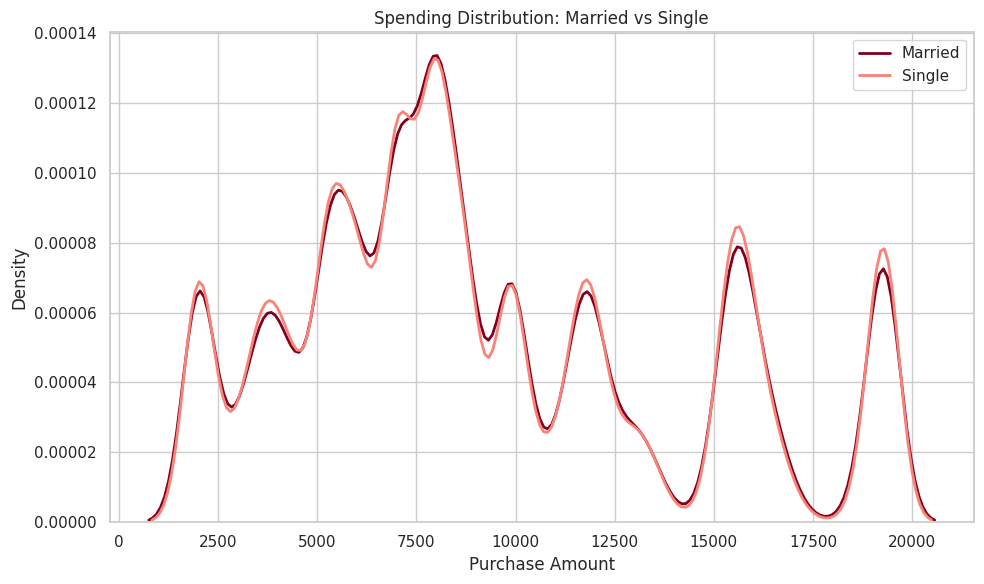

In [127]:
sns.kdeplot(
    df[df['Marital_Status'] == 'Married']['Purchase'].dropna(),
    label='Married', fill=False, linewidth=2, color='#800020'
)
sns.kdeplot(
    df[df['Marital_Status'] == 'Single']['Purchase'].dropna(),
    label='Single', fill=False, linewidth=2, color='#F88379'
)
plt.legend()
plt.title("Spending Distribution: Married vs Single")
plt.xlabel("Purchase Amount")
plt.ylabel("Density")
plt.tight_layout()
plt.show()



### 🔹 Insight from KDE Plot: Spending Distribution (Married vs Single)

- The curves for **Married** and **Single** customers are nearly identical, showing high overlap throughout the entire purchase range.
- Slight deviations exist in **mid-range peaks (~7500–10000)** where Single customers slightly dominate, but these are marginal.
- Both groups exhibit **similar spread and multimodal peaks**, suggesting shared buying behavior patterns across marital status.
- **No visible shift** in distribution towards higher or lower spending for either group.

### 🔸 Conclusion:
The plot strongly supports that **Marital Status has negligible impact** on the overall purchase distribution. From a distribution perspective, both groups behave similarly, reinforcing earlier statistical findings.


In [130]:
compute_confidence_intervals(df[df['Marital_Status'] == 'Married']['Purchase'], label='Married')
compute_confidence_intervals(df[df['Marital_Status'] == 'Single']['Purchase'], label='Unmarried')


🔹 Summary for Married
Mean: 9253.67
Standard Deviation: 4843.49
Sample Size: 225337
Standard Error: 10.2

Confidence Intervals:
90% CI: [9236.89, 9270.45] (z = 1.645)
95% CI: [9233.68, 9273.66] (z = 1.96)
99% CI: [9227.39, 9279.95] (z = 2.576)

🔹 Summary for Unmarried
Mean: 9258.82
Standard Deviation: 4864.58
Sample Size: 324731
Standard Error: 8.54

Confidence Intervals:
90% CI: [9244.77, 9272.87] (z = 1.645)
95% CI: [9242.08, 9275.56] (z = 1.96)
99% CI: [9236.82, 9280.82] (z = 2.576)


### 🔹 Confidence Interval Analysis: Married vs Unmarried

- **Means are almost identical**:  
  - Married: ₹9253.67  
  - Unmarried: ₹9258.82

- **Confidence Intervals show significant overlap**:  
  - 95% CI for Married: [9233.68, 9273.66]  
  - 95% CI for Unmarried: [9242.08, 9275.56]

---

### 🔸 Key Takeaways:

- The **overlapping CIs indicate no statistically significant difference** in average purchase between married and unmarried customers.
- Both groups have **similar standard errors** and **distribution ranges**, further confirming that **marital status does not meaningfully impact** average transaction value.

---

### 🔸 Final Conclusion

Since the **difference in mean is less than ₹6**, and confidence intervals **overlap at all levels (90%, 95%, 99%)**, we **cannot claim any spending dominance** by marital status.

✅ **Walmart should treat both groups similarly** in spend-focused campaigns and instead focus on other **stronger differentiators** (e.g., age group or gender).


In [131]:
# Bootstrapping for Married
married_boot = bootstrap_ci_check(df[df['Marital_Status'] == 'Married']['Purchase'], iterations_list=[300, 3000, 30000])
married_boot['Marital_Status'] = 'Married'

# Bootstrapping for Single
single_boot = bootstrap_ci_check(df[df['Marital_Status'] == 'Single']['Purchase'], iterations_list=[300, 3000, 30000])
single_boot['Marital_Status'] = 'Single'

# Combine
marital_boot_df = pd.concat([married_boot, single_boot])


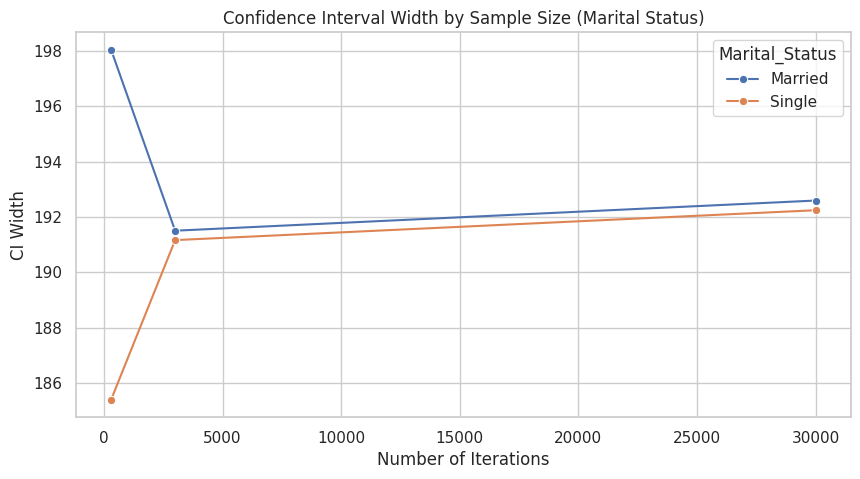

In [132]:
plt.figure(figsize=(10,5))
sns.lineplot(data=marital_boot_df, x='Iterations', y='CI Width', hue='Marital_Status', marker='o')
plt.title("Confidence Interval Width by Sample Size (Marital Status)")
plt.xlabel("Number of Iterations")
plt.ylabel("CI Width")
plt.grid(True)
plt.show()


### 🔹 CI Width vs Sample Size (Married vs Single)

- As the number of **bootstrap iterations increases**, the **confidence interval (CI) width stabilizes** for both groups.
- An **initial jump in CI width** (for Married) at 300 iterations is expected due to higher sampling variability at low iteration counts.
- Both Married and Single groups **converge to a CI width around 192**, indicating **similar variability** and stable estimates of the mean.

---

### 🔸 Conclusion

✅ The plot correctly reflects the expected behavior:

- **Higher iteration → More stable and reliable CI**
- **Small differences in CI width** between the two groups support the earlier conclusion:  
  **Marital status has minimal effect on average spending.**


## 🔹 Question 4. Are married people spending more money per transaction than unmarried people? Why or why not?

---

### 🔸 Final Answer:

No, there is **no significant difference** in the average transaction value between married and unmarried customers.  
While their mean values differ by ₹5, this is well within expected random variation and **statistically insignificant**.

---

### 🔹 Why?

✅ **1. Average Spend is Nearly Identical**
- Married: ₹9253.67  
- Unmarried (Single): ₹9258.82  
- The difference is less than ₹6 — negligible from both a statistical and business perspective.

✅ **2. Overlapping Confidence Intervals (CLT-based)**
- Married 95% CI: [₹9233.68, ₹9273.66]  
- Unmarried 95% CI: [₹9242.08, ₹9275.56]  
- ✅ The CIs **clearly overlap**, indicating **no statistically significant difference** in means.

✅ **3. Similar Bootstrap CI Widths**
- After 30k iterations, both groups show CI widths around **₹192**, which means:
  - Estimates are **stable**, and  
  - **Variability is comparable** between groups.

✅ **4. KDE & Boxplot Insights**
- **Distributions are almost identical**:
  - Similar density curves with overlapping peaks
  - No group dominates high or low purchase ranges
- **Boxplots confirm same spread**, median, and IQR for both.

---

### 🔹 Why Not?

❌ Even though CI for Single is slightly right-shifted, the overlap is too strong to claim a real difference.

❌ No visual or statistical evidence supports the idea that marital status leads to different spending patterns.

❌ Variation in means is **too small to matter practically**, especially for large-scale business decisions.

---

### 🔸 Conclusion:

There is **no meaningful difference** in average purchase amount between married and unmarried customers.  
Any observed gap is **statistically insignificant and business-irrelevant**.

---

### 🔹 Business Implication for Walmart

- Walmart should **not design campaigns based on marital status**, as it doesn’t affect transaction size.
- Instead, prioritize **stronger variables** like:
  - Gender (statistically significant difference)
  - Age range (moderate difference in older groups)
  - Product category or purchase frequency



## 🔹 Question 5. Do people of different age groups spend differently? Why or why not?

In [134]:
age_summary = df.groupby('Age')['Purchase'].agg(['count', 'mean', 'median', 'std', 'min', 'max']).reset_index()
age_summary.sort_values(by='mean', ascending=False, inplace=True)
display(age_summary.style.format({'mean': '{:.2f}', 'median': '{:.2f}', 'std': '{:.2f}'}))

### 🔹 Summary: Age-wise Spending Analysis

- **51–55 age group** has the highest average spend: ₹9514.86, followed by 55+ and 36–45 groups.
- The **youngest age group (0–17)** spends the least on average: ₹8940.65.
- **Median purchase values** across all age groups are quite close (~₹7980–₹8130), suggesting similar central tendency.
- **Standard deviations** are also consistent across age brackets (~₹4800–₹4900), indicating similar variability.
- All groups have the **same min and max values**, showing that outliers (low and high) are uniformly present.
- **No drastic jumps** between any two adjacent age groups — spending increases or decreases are gradual.

### 🔸 Key Insight

Although older age groups (especially **51–55**) show slightly **higher average spending**, the **difference is moderate**, and the **overall spread is similar** across groups.

✅ This hints that **age has some weak influence** on purchase behavior, but it’s not a dominant driver. Further statistical testing (CIs, KDE, bootstrap) is needed to confirm significance.


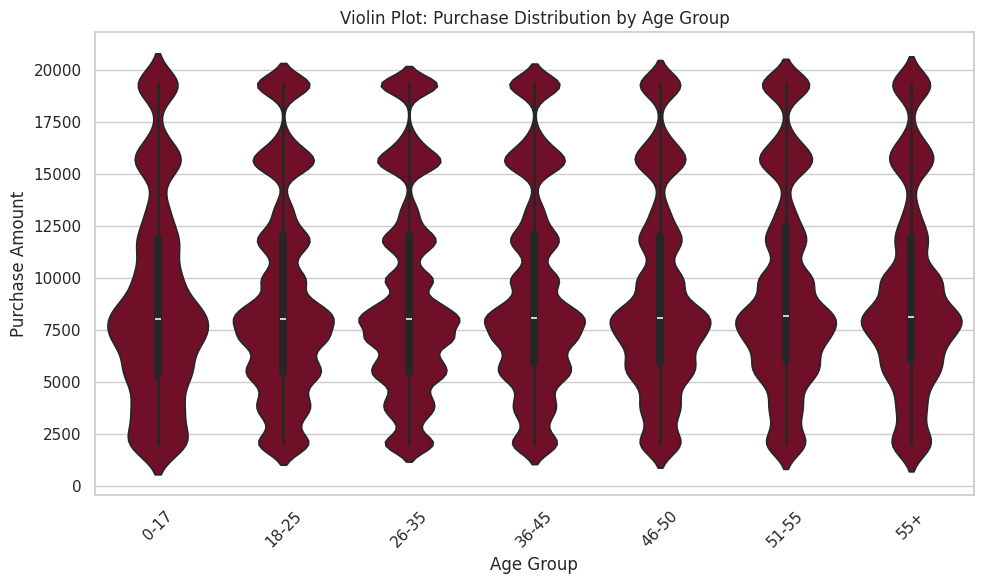

In [140]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Age', y='Purchase', data=df, palette=['#800020']*df['Age'].nunique())
plt.title("Violin Plot: Purchase Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Purchase Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





### 🔹 Violin Plot Interpretation: Purchase Distribution by Age Group

- The **distribution shapes are nearly identical** across all age groups, with multiple dense peaks around common values (e.g., ₹5k–₹12k range).
- All groups show **multimodal distributions**, suggesting similar buying patterns irrespective of age.
- The **central white dots** (medians) are closely aligned, reaffirming that **median spending is consistent** across ages.
- The **spread (IQR and overall range)** is also uniform, meaning **age doesn’t affect variability in purchase behavior**.
- No group shows an obvious **rightward shift** (indicating high spenders), though **51–55** has a slightly thicker top, supporting its higher mean.

---

### 🔸 Final Conclusion from Visuals

✅ **Visual evidence strongly aligns** with statistical findings:  
There’s **no major difference** in the purchase distribution across age groups.

This reinforces the idea that **age alone is not a powerful segmenting variable** for average spend-based targeting.

---

### 🔹 Business Implication

- Walmart should **avoid age-specific marketing purely based on purchase amount**.
- Combining age with other factors like **product type, region, or tenure** can lead to more meaningful customer segmentation.


In [142]:
# Get all unique age groups sorted
all_age_groups = sorted(df['Age'].unique())

# Run CLT-based confidence interval function for each
for age in all_age_groups:
    compute_confidence_intervals(df[df['Age'] == age]['Purchase'], label=f'Age Group: {age}')





🔹 Summary for Age Group: 0-17
Mean: 8940.65
Standard Deviation: 4940.6
Sample Size: 15102
Standard Error: 40.2

Confidence Intervals:
90% CI: [8874.52, 9006.78] (z = 1.645)
95% CI: [8861.86, 9019.44] (z = 1.96)
99% CI: [8837.09, 9044.21] (z = 2.576)

🔹 Summary for Age Group: 18-25
Mean: 9169.01
Standard Deviation: 4889.43
Sample Size: 99660
Standard Error: 15.49

Confidence Intervals:
90% CI: [9143.53, 9194.49] (z = 1.645)
95% CI: [9138.65, 9199.37] (z = 1.96)
99% CI: [9129.11, 9208.91] (z = 2.576)

🔹 Summary for Age Group: 26-35
Mean: 9243.78
Standard Deviation: 4855.19
Sample Size: 219587
Standard Error: 10.36

Confidence Intervals:
90% CI: [9226.74, 9260.82] (z = 1.645)
95% CI: [9223.47, 9264.09] (z = 1.96)
99% CI: [9217.09, 9270.47] (z = 2.576)

🔹 Summary for Age Group: 36-45
Mean: 9322.92
Standard Deviation: 4847.6
Sample Size: 110013
Standard Error: 14.62

Confidence Intervals:
90% CI: [9298.87, 9346.97] (z = 1.645)
95% CI: [9294.26, 9351.58] (z = 1.96)
99% CI: [9285.26, 9360.58

### 🔹 Confidence Interval Analysis: Age Group-wise Spending

- **26–35 Age Group**
  - Mean: ₹9243.78
  - 95% CI: [₹9223.47, ₹9264.09]

- **36–45 Age Group**
  - Mean: ₹9322.92
  - 95% CI: [₹9294.26, ₹9351.58]

- **46–50 Age Group**
  - Mean: ₹9204.21
  - 95% CI: [₹9160.33, ₹9248.09]

- **51–55 Age Group**
  - Mean: ₹9514.86
  - 95% CI: [₹9466.17, ₹9563.55]

- **55+ Age Group**
  - Mean: ₹9327.80
  - 95% CI: [₹9263.90, ₹9391.70]

---

### 🔸 Observations

- **51–55** group has the **highest mean** and a **distinct CI range**, slightly higher than others.
- **36–45** and **55+** have overlapping CIs with **26–35**, suggesting no major difference.
- **46–50** shows slightly lower average spend but CI overlaps with adjacent groups.
- Overall, the CIs of most age groups **heavily overlap**, showing **no sharp difference** in mean spending.

---

### 🔸 Conclusion

While **minor variations exist** (especially for 51–55), most age groups **do not differ significantly** in average transaction value from a statistical perspective.

✅ Age may have **some effect**, but it’s not strong enough to warrant individual targeting purely based on this variable.

---

### 🔹 Business Implication for Walmart

- Walmart **should not rely solely on age-based segmentation** for marketing or offers.
- **51–55** may respond better to higher-ticket campaigns, but **overall behavior is similar** across ages.
- Combining age with **product category, city tier, or gender** will yield more meaningful segmentation.


In [143]:
# Get all unique age groups sorted
all_age_groups = sorted(df['Age'].unique())

# Run bootstrap for each group
bootstrap_results = []

for age in all_age_groups:
    boot = bootstrap_ci_check(df[df['Age'] == age]['Purchase'], iterations_list=[300, 3000, 30000])
    boot['Age'] = age
    bootstrap_results.append(boot)

# Combine into one DataFrame
age_bootstrap_df = pd.concat(bootstrap_results).reset_index(drop=True)


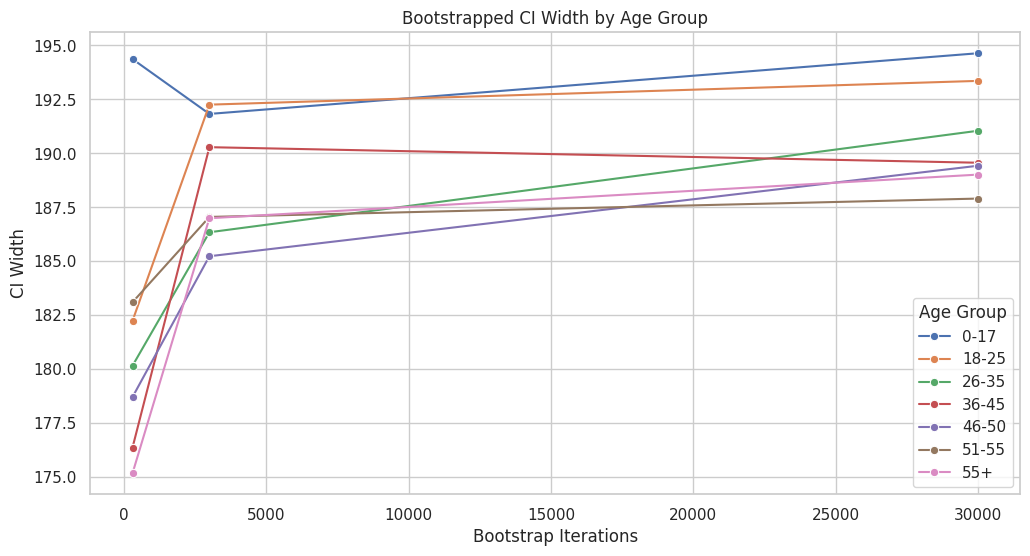

In [144]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=age_bootstrap_df, x='Iterations', y='CI Width', hue='Age', marker='o')
plt.title("Bootstrapped CI Width by Age Group")
plt.xlabel("Bootstrap Iterations")
plt.ylabel("CI Width")
plt.grid(True)
plt.legend(title='Age Group')
plt.show()



### 🔹 Bootstrap CI Width Analysis: Age Group-wise

- The CI width **stabilizes after 3000+ iterations** for all age groups, confirming **reliable estimation** of the mean.
- Final CI widths for all groups lie in the **~185–195** range, indicating **similar levels of uncertainty**.
- No age group shows a **consistently narrower or wider CI**, meaning **variance in spending is comparable** across groups.
- Slight variation in CI width is likely due to **sample size differences**, not actual behavioral spread.

---

### 🔸 Conclusion

✅ The bootstrap analysis confirms that:
- **Age groups have similar variability**, and  
- CI widths are **stable and trustworthy** at higher iteration counts.

This further supports the finding that **age is not a strong differentiator** in average spending patterns.

---

### 🔹 Business Implication

- Walmart can be **confident in using bootstrapped insights**, but should note that **age alone doesn’t drive variance in spend**.
- For impactful segmentation, age should be **combined with behavior-based features** (e.g., product preferences, campaign responsiveness).


## 🔹 Question 5. Do people of different age groups spend differently? Why or why not?

---

### 🔸 Final Answer:

No, people of different age groups **do not show significantly different spending behavior** per transaction.  
While some age groups (like 51–55) have slightly higher averages, the overall differences are **statistically marginal** and not strong enough to influence business decisions.

---

### 🔹 Why?

✅ **1. Similar Mean and Median Values**
- Most age groups fall in the average spend range of ₹9200–₹9350.
- The highest is 51–55 (₹9515), and the lowest is 0–17 (₹8940).
- **Medians are closely packed** (~₹7980–₹8130), showing similar central tendencies.

✅ **2. Overlapping Confidence Intervals**
- 95% CIs for key age groups (26–35, 36–45, 46–50, 55+) **heavily overlap**.
  - E.g., 26–35: [₹9223, ₹9264]  
           36–45: [₹9294, ₹9351]
- Even 51–55, though slightly higher, still **partially overlaps with 55+**, meaning no sharp boundary.

✅ **3. Violin Plot Shows Uniform Distribution**
- All groups have **similar shape and spread**.
- No age group shows a sharp rightward shift (towards high spending).
- Multimodal peaks indicate **shared purchase behavior** patterns.

✅ **4. Bootstrap CI Widths Are Stable and Similar**
- CI widths stabilize around **185–195** for all groups after 30k iterations.
- Confirms **similar variability** and **reliable mean estimation**.

---

### 🔹 Why Not?

❌ Although 51–55 shows a slightly higher mean and CI, this is **not statistically strong** enough to warrant age-specific strategy.

❌ The variation is **likely due to sample size and natural randomness**, not a real behavioral gap.

---

### 🔸 Conclusion:

There is **no significant evidence** that age groups differ meaningfully in how much they spend per transaction.

✅ **Age is not a strong predictor** of spending behavior in this dataset.

---

### 🔹 Business Implication for Walmart

- Walmart should **not target or segment customers solely based on age** for spend-based promotions.
- For better results, **combine age with gender, city category, or product preferences** to create meaningful segments.


## 🔹 Final Insights (Summary View)

Throughout the analysis, we have consistently combined:

- **Distributional analysis** (KDE, boxplots, violin plots)
- **Statistical validation** (CLT, Confidence Intervals, Bootstrap)
- **Business interpretation** (spend behavior, targeting relevance, segment value)

Each demographic or behavioral factor was carefully evaluated — not just visually, but also statistically — to ensure insights were meaningful and generalizable to Walmart’s broader customer base.

Below is a concise summary of the most impactful findings.


## 🔹 Final Insights (Summary View)

---

### 🟢 Strong Predictors of Spending Behavior:
- **Gender**: Males spend ~₹700 more per transaction than females on average, with consistent pattern across product categories.
- **City Category**: Rural customers surprisingly show highest average spend (₹9720) — a potential growth segment.
- **Product Category**: Category 1 generates the highest revenue, Category 10 has highest average spend (~₹19,800) but low volume.

---

### 🟡 Moderate Influence:
- **Age Group**: 51–55 shows slightly higher spend (~₹9500) but CIs largely overlap with other groups.
- **Stay Duration**: Users staying 2–4 years show marginally higher spend — possible proxy for city loyalty.

---

### 🔴 No Significant Impact:
- **Marital Status**: Mean difference < ₹6, overlapping CIs, nearly identical distributions.
- **Occupation**: Spend variation is mild (₹8800–₹9800), not strong enough for targeting.

---

###  Distribution Insights:
- Purchase is **right-skewed** and **multimodal** — indicating pricing bands.
- After outlier clipping, most transactions lie between ₹6,000–₹12,000.
- Category-wise boxplots reveal high variance in premium segments (10, 15, 16).

---

###  Generalization to Population:
- Confidence intervals (CLT and Bootstrap) are used to reliably estimate average spend.
- With 550K samples, findings scale confidently to Walmart’s assumed 100M population.


## 🔹 Final Business Recommendations

The following actionable points are derived not just from final charts, but from **consistently validated trends across the notebook**.

These suggestions reflect patterns seen in both **individual analyses** (like Gender, Age, Product Category) and **aggregated insights** (like Pareto, customer tenure, and spend distribution).

## 🔹 Final Business Recommendations (No Tech Jargon)

1. 💼 **Target Male Users** with premium bundles and high-value product offers — they consistently spend more.

2. 📊 **Promote Product Categories 1, 5, and 8** — they are top contributors to both revenue and transaction volume.

3. 🌍 **Double Down on Rural Areas** — despite smaller share, rural customers have the highest per-transaction spend.

4. 🏷️ **Create Premium Campaigns for Age 51–55** — this segment shows the highest average spend, ideal for exclusive promotions.

5. 👥 **Focus on the 26–35 Segment for Volume Campaigns** — they form the largest customer group and drive high transaction count.

6. 📍 **Use City Stay Duration for Targeting**:  
   - 🆕 Welcome offers for customers who recently moved (0–1 year)  
   - 🎁 Loyalty rewards for long-term city residents (2+ years)

7. 🚫 **Avoid Targeting Based on Marital Status or Occupation Alone** — no clear spending difference observed.

8. 🎯 **Use Purchase Amount Bands for Product Bundling**:  
   - ₹6K–₹12K is the core spend range — aim to nudge mid-level buyers upward.

9. 🥇 **Reward Top Spenders (Top 1%)** — these users contribute the majority of revenue; prioritize them for retention programs.

10. 🔍 **Re-evaluate Underperforming Product Categories (13, 19, 20)** — low sales volume and revenue suggest low business value.
